# FIT5149 S1 2020 Assessment 1: Bushfire Analysis using Meteorological Data


Student information
- Family Name: Joseph
- Given Name: Rahul
- Student ID: 30347734
- Student email: rjos0007@student.monash.edu

Programming Language: R 3.6.1 in Jupyter Notebook

R Libraries used:
 - dplyr
 - psych
 - e1071
 - corrplot
 - ISLR
 - leaps
 - randomForest
 - xgboost
 - gbm
 - caret
 - broom
 - dummies


## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

---

## 1. Introduction <a class="anchor" id="sec_1"></a>

In this task, we would like to explore machine learning methods for predicting the burnt area of bushfires by the use of meteorological data that can influence wildfires. Originally collected from northeast Portugal between January 2000 and December 2003, our data set will be used here. It contains geographical information, fire weather indices, and the corresponding weather conditions. The aim is to build statistical models that can predict the burned area of the bushfires.<br>
We have perform 2 tasks:
 * ###### Prediction Task
      For the prediction task, the underlying problem is to predict the burned area of fires using the collected attributes.In this task, we are required to develop models that can accurately predict the burned areas. We have to perform 3 objectives that is develop and compare 2 to 3 models, describe and justify the choice of models & analyze and interpret the results.
<br>
<br>
 * ###### Description Task
     The purpose of the description task is to identify the key factors that have strong effects on the burned areas. Descriptions can be based on variable correlation analysis, regression equations, or any other statistical analysis. Identify a subset of attributes that have a significant impact on the prediction of the burned area, and report your identification with statistical evidence (e.g. correlations, pvalues) and interpret the identified attribute subset (e.g. as to why certain attributes have certain impacts on the prediction).


The dataset contains 517 fire instances, each of which have 13 columns: the first 12 columns corresponding to the attributes
(e.g., spatial coordinates, month,day, four fire indices, and other meteorological data) and the last column containing the 
burned area, i.e., the variable that we will predict.

<h3>Attribute information:</h3><br>
1.  Spatial information
  
  * X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
  * Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
<br><br>

2.  Temporal information

  * month - month of the year: 'jan' to 'dec'
  * day - day of the week: 'mon' to 'sun'
<br><br>

3.FWI: The forest Fire Weather Index (FWI)(which is the Canadian system for rating fire danger.)

  * FFMC - FFMC index from the FWI system: 18.7 to 96.20
  * DMC - DMC index from the FWI system: 1.1 to 291.3
  * DC - DC index from the FWI system: 7.9 to 860.6
  * ISI - ISI index from the FWI system: 0.0 to 56.10
<br><br>

4.  Methorological information

  * temp - temperature in Celsius degrees: 2.2 to 33.30
  * RH - relative humidity in %: 15.0 to 100
  * wind - wind speed in km/h: 0.40 to 9.40
  * rain - outside rain in mm/m2 : 0.0 to 6.4
<br><br>

5.  area - the burned area of the forest (in ha): 0.00 to 1090.84


In [1]:
# install required packages for this file
# install.packages(dplyr)
# install.packages(psych)
# install.packages(e1071)
# install.packages(corrplot)
# install.packages(ISLR)
# install.packages(leaps)
# install.packages(randomForest)
# install.packages(xgboost)
# install.packages(gbm)
# install.packages(caret)
# install.packages(broom)
# install.packages(dummies)
# install.packages(MASS)

In [2]:
# warning off command
options(warn = -1)
# importing the required libraries
require(dplyr)
require(psych)
require(e1071)
require(corrplot)
require(ISLR)
require(leaps)
require(randomForest)
require(xgboost)
require(gbm)
library(caret)
library(broom)
library(dummies)
library(MASS)

Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: psych
Loading required package: e1071
Loading required package: corrplot
corrplot 0.84 loaded
Loading required package: ISLR
Loading required package: leaps
Loading required package: randomForest
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:psych':

    outlier

The following object is masked from 'package:dplyr':

    combine

Loading required package: xgboost

Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice

Loading required package: gbm
Loaded gbm 2.1.5
Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is maske

## 2. Data Exploration<a class="anchor" id="sec_2"></a>

#### 2.1 Read Data

Reading the `forestfires` dataset and storing it into a dataframe.

In [3]:
# Read the csv file forestfires.csv 
df <- read.csv(file="forestfires.csv",header = TRUE,sep=',')

#### 2.2 Overview of the Dataset

First we will look at the dimensions of the dataset, view few records of the dataset, explore basic statistics (like mean, median, mode), the data structure, the number of unique values and whether the values in the dataset are missing.

In [4]:
# Display the dimensions
cat("The forest fire dataset has", dim(df)[1], "records, each with", dim(df)[2],
    "attributes. \n\nThe structure is:\n\n")

# Display the structure
str(df)

cat("\nThe first few and last few records in the dataset are:")
# Inspect the first few records
head(df)
# And the last few
tail(df)

cat("\nBasic statistics for each attribute are:")
# Statistical summary 
summary(df)

# number of unique values
cat("The numbers of unique values for each attribute are:")
apply(df, 2, function(x) length(unique(x)))
cat("\n")
      
# count of missing values
cat("The number of missing values for each attribute are:\n")      
sapply(df, function(x) sum(is.na(x)))

The forest fire dataset has 517 records, each with 13 attributes. 

The structure is:

'data.frame':	517 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : int  5 4 4 6 6 6 6 6 6 5 ...
 $ month: Factor w/ 12 levels "apr","aug","dec",..: 8 11 11 8 8 2 2 2 12 12 ...
 $ day  : Factor w/ 7 levels "fri","mon","sat",..: 1 6 3 1 4 4 2 2 6 3 ...
 $ FFMC : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...

The first few and last few records in the dataset are:

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
512,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0,0.00
513,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0,6.44
514,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0,54.29
515,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0,11.16
516,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0,0.00
517,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0,0.00



Basic statistics for each attribute are:

       X               Y           month      day          FFMC      
 Min.   :1.000   Min.   :2.0   aug    :184   fri:85   Min.   :18.70  
 1st Qu.:3.000   1st Qu.:4.0   sep    :172   mon:74   1st Qu.:90.20  
 Median :4.000   Median :4.0   mar    : 54   sat:84   Median :91.60  
 Mean   :4.669   Mean   :4.3   jul    : 32   sun:95   Mean   :90.64  
 3rd Qu.:7.000   3rd Qu.:5.0   feb    : 20   thu:61   3rd Qu.:92.90  
 Max.   :9.000   Max.   :9.0   jun    : 17   tue:64   Max.   :96.20  
                               (Other): 38   wed:54                  
      DMC              DC             ISI              temp      
 Min.   :  1.1   Min.   :  7.9   Min.   : 0.000   Min.   : 2.20  
 1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500   1st Qu.:15.50  
 Median :108.3   Median :664.2   Median : 8.400   Median :19.30  
 Mean   :110.9   Mean   :547.9   Mean   : 9.022   Mean   :18.89  
 3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800   3rd Qu.:22.80  
 Max.   :291.3   Max.   :860.6   Max.   :56.

The numbers of unique values for each attribute are:

X     Y month   day  FFMC   DMC    DC   ISI  temp    RH  wind  rain  area 
    9     7    12     7   106   215   219   119   192    75    21     7   251


The number of missing values for each attribute are:


X     Y month   day  FFMC   DMC    DC   ISI  temp    RH  wind  rain  area 
    0     0     0     0     0     0     0     0     0     0     0     0     0

<h4>Highlists from the above informations:</h4>

<p>So the Bushfire dataset is fairly large with 517 rows and 13 columns.<br><br> The data is stored in a tabular form with 2 categorical columns (namely month and days) and the remaining columns are numerical columns out of which 3 columns are of integer type and others in numeric type.
<br><br>
From the basic statistics we could understand the for area the median is at 0.52 which provides an insight that there is high chance for concentration of points at the value meaning most of the area burned will be around the value of 0.52 ha. Also area has a maximum value of 1090.84 ha which indicates that there is high chance for the distribution to be skewed. The other thing is that all the columns containing numerical values spread across different range.<br><br>We could also learn that there no missing values in the dataset.
</p>

#### 2.3 Find the descriptive statistics of variables & describe the interesting observations.

Next we go a little further into the dataset by looking at the descriptive statistics of the variables:

In [5]:
round(describe(df),3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,517,4.669,2.314,4.00,4.672,2.965,1.0,9.00,8.00,0.036,-1.180,0.102
Y,2,517,4.300,1.230,4.00,4.308,1.483,2.0,9.00,7.00,0.415,1.378,0.054
month*,3,517,6.758,4.373,7.00,6.720,7.413,1.0,12.00,11.00,0.084,-1.719,0.192
day*,4,517,3.737,1.925,4.00,3.672,2.965,1.0,7.00,6.00,0.157,-1.109,0.085
FFMC,5,517,90.645,5.520,91.60,91.455,1.927,18.7,96.20,77.50,-6.537,66.139,0.243
DMC,6,517,110.872,64.046,108.30,106.522,51.743,1.1,291.30,290.20,0.544,0.179,2.817
DC,7,517,547.940,248.066,664.20,578.692,118.905,7.9,860.60,852.70,-1.094,-0.265,10.910
ISI,8,517,9.022,4.559,8.40,8.727,3.113,0.0,56.10,56.10,2.522,21.146,0.201
temp,9,517,18.889,5.807,19.30,19.091,5.337,2.2,33.30,31.10,-0.329,0.111,0.255


<b>More detail on the variables(Columns of forestfire dataset) is given by the descriptive statistics:</b>

*  As mentioned above, we could see that the range for numerical columns is different and distributed.
*  `area` and `rain` has very high skew values.
*  Of the lot `area` has the maximum spread in the range which starts from 0.0 and end at 1090.84
*  The `area`, `DC` and `DMC`, has the highest standard errors in dataset when compared with other columns.
*  Columns such as `FFMC`,`ISI`,`rain` and `area` have positive kurtosis indicating a fat-tailed distribution.
*  `DMC`,`DC`,`area`,`temp`,`RH` shows very high values of standard deviation.

We can compare the standard deviation for variables 

In [6]:
sort(apply(df, 2, sd,))

rain           Y        wind           X         ISI        FFMC 
  0.2959591   1.2299004   1.7916526   2.3137778   4.5594772   5.5201108 
       temp          RH        area         DMC          DC 
  5.8066253  16.3174692  63.6558185  64.0464822 248.0661917

`RH`,`area`,`DMC` and `DC` has high values of standard deviation where as `rain`,`X`,`Y` and `wind` has low values standard deviation.

#### 2.4 Graphical Investigation on Variables

<b> 2.4.1 Single variable Analysis</b>

Generating Boxplot and Histogram for all the variables.
<br><br>Note: Here we are only considering the non-categorial variables.


						Single Variable Analysis

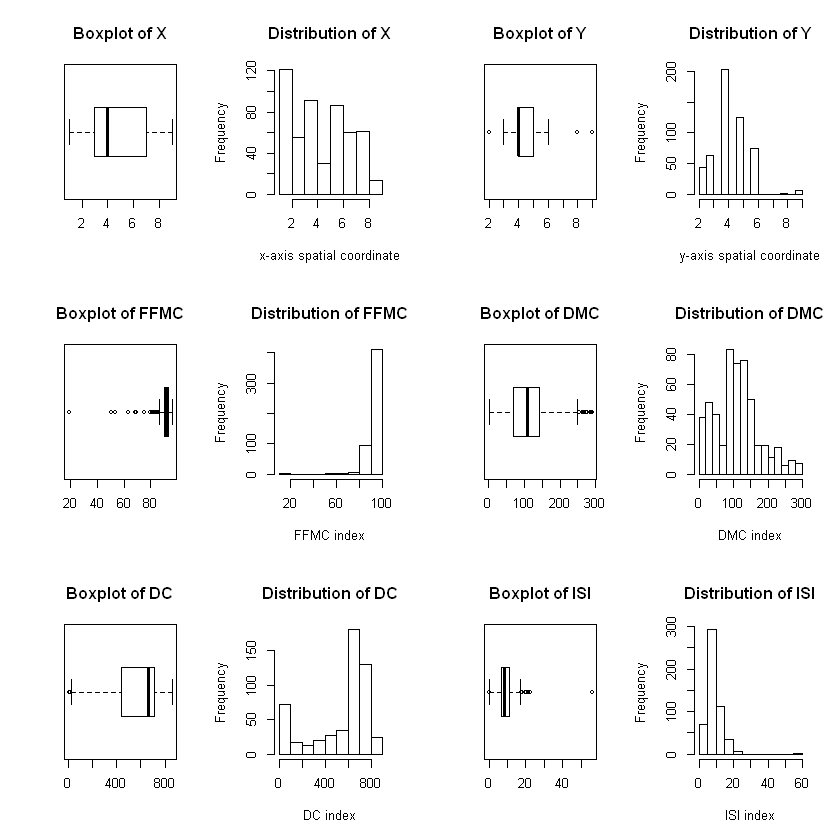

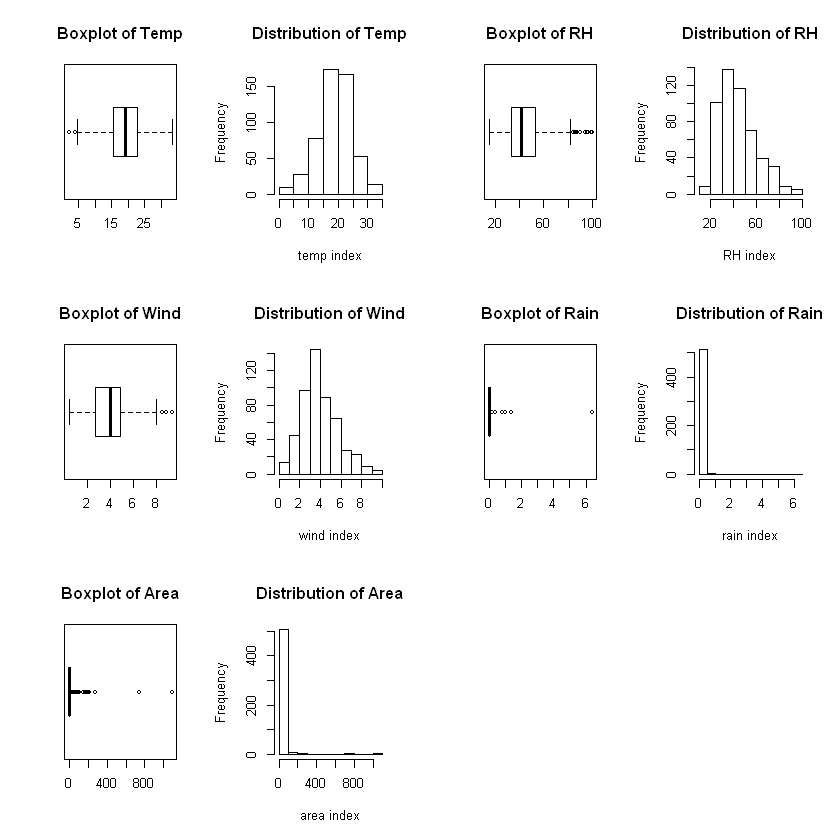

In [7]:
# Subplots for fitting boxplot and histogram of all the variables.
par(mfrow = c(3,4))  # 3*4 =12 only 11 required

# plot boxplot and histogram for single variable analysis
cat("\n\t\t\t\t\t\tSingle Variable Analysis")
# X column
boxplot(df$X,horizontal = TRUE,main = "Boxplot of X")
hist(df$X, main = "Distribution of X", xlab = "x-axis spatial coordinate")
# Y column
boxplot(df$Y,horizontal = TRUE,main = "Boxplot of Y")
hist(df$Y, main = "Distribution of Y", xlab = "y-axis spatial coordinate")
# FFMC column
boxplot(df$FFMC,horizontal = TRUE,main = "Boxplot of FFMC")
hist(df$FFMC, main = "Distribution of FFMC", xlab = "FFMC index")
# DMC column
boxplot(df$DMC,horizontal = TRUE,main = "Boxplot of DMC")
hist(df$DMC, main = "Distribution of DMC", xlab = "DMC index")
# DC column
boxplot(df$DC,horizontal = TRUE,main = "Boxplot of DC")
hist(df$DC, main = "Distribution of DC", xlab = "DC index")
# ISI column
boxplot(df$ISI,horizontal = TRUE,main = "Boxplot of ISI")
hist(df$ISI, main = "Distribution of ISI", xlab = "ISI index")
# Temp column
boxplot(df$temp,horizontal = TRUE,main = "Boxplot of Temp")
hist(df$temp, main = "Distribution of Temp", xlab = "temp index")
# RH column
boxplot(df$RH,horizontal = TRUE,main = "Boxplot of RH")
hist(df$RH, main = "Distribution of RH", xlab = "RH index")
# Wind column
boxplot(df$wind,horizontal = TRUE,main = "Boxplot of Wind")
hist(df$wind, main = "Distribution of Wind", xlab = "wind index")
# Rain column
boxplot(df$rain,horizontal = TRUE,main = "Boxplot of Rain")
hist(df$rain, main = "Distribution of Rain", xlab = "rain index")
# Area column
boxplot(df$area,horizontal = TRUE,main = "Boxplot of Area")
hist(df$area, main = "Distribution of Area", xlab = "area index")

<b>Insights from the plots above:</b>
* From the boxplots we could understand that almost all the variables (except x-axis spatial coordinate) have outliers.Therefore, removing the outlier would be benifitable.
* We could say that temperature, wind and relative humidity are almost normally distributed.
* Rest of the variables are skewed which can be seen from there histogram plots. Majority of the variables are skewed so log transformation or min/max transformation depending on respective results might help in reducing the skewness in the variables.

###### Transformation 

In this section will perform Square Root Transformation on the variables whose skewness can be improved by doing this.<br>
We will apply Sqaure root transformation and Log Transformation mainly.<br>
Below shows the skewness values of all the (numerical)columns:<br>

In [8]:
for (i in colnames(df[,-c(3,4)]))
{
   cat("\nSkew value of",i,": ",skewness(df[,i]))  
}


Skew value of X :  0.03603577
Skew value of Y :  0.4148779
Skew value of FFMC :  -6.537499
Skew value of DMC :  0.5443249
Skew value of DC :  -1.094068
Skew value of ISI :  2.521627
Skew value of temp :  -0.329253
Skew value of RH :  0.8579033
Skew value of wind :  0.567692
Skew value of rain :  19.7015
Skew value of area :  12.77248

Based on the skewness value we will apply transformations on:
- FFMC
- DMC
- DC
- ISI
- wind
- RH
- Rain
- area (will be performed in Target variable analysis section below) 

<u>Wind</u>

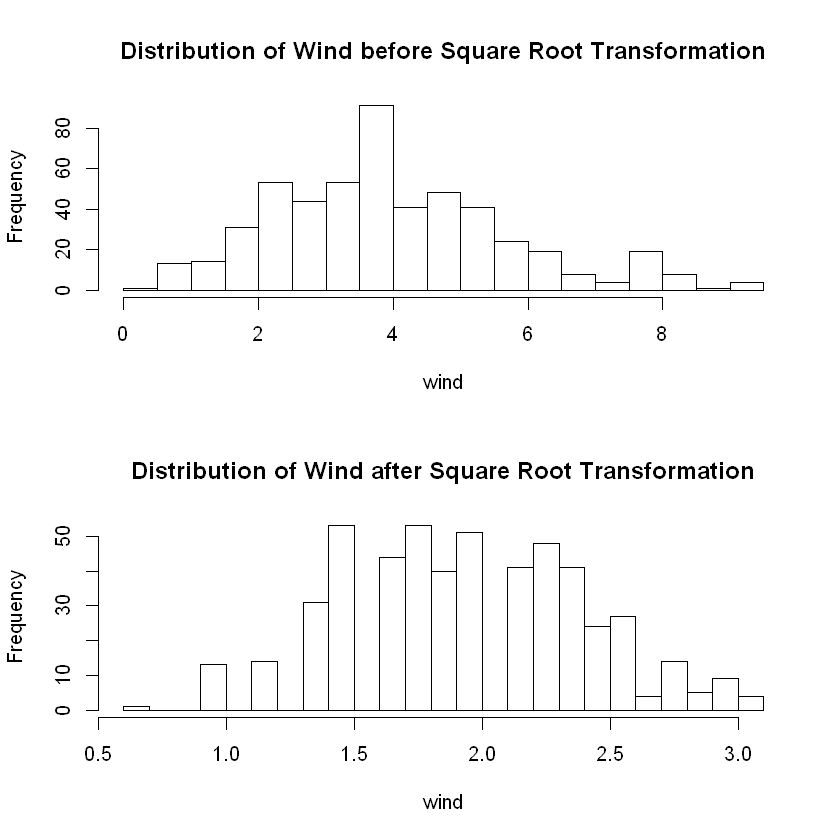

In [9]:
par(mfrow = c(2,1)) 
# plot the distribution of variable
hist(df$wind,30,main = "Distribution of Wind before Square Root Transformation", xlab = "wind")
# plot the distribution of variable
hist(sqrt(df$wind),30,main = "Distribution of Wind after Square Root Transformation", xlab = "wind")

In [10]:
cat("SKEWNESS level has reduced or improved from",skewness((df$wind)),"to",skewness(sqrt(df$wind)))

SKEWNESS level has reduced or improved from 0.567692 to -0.00821058

<u>ISI</u>

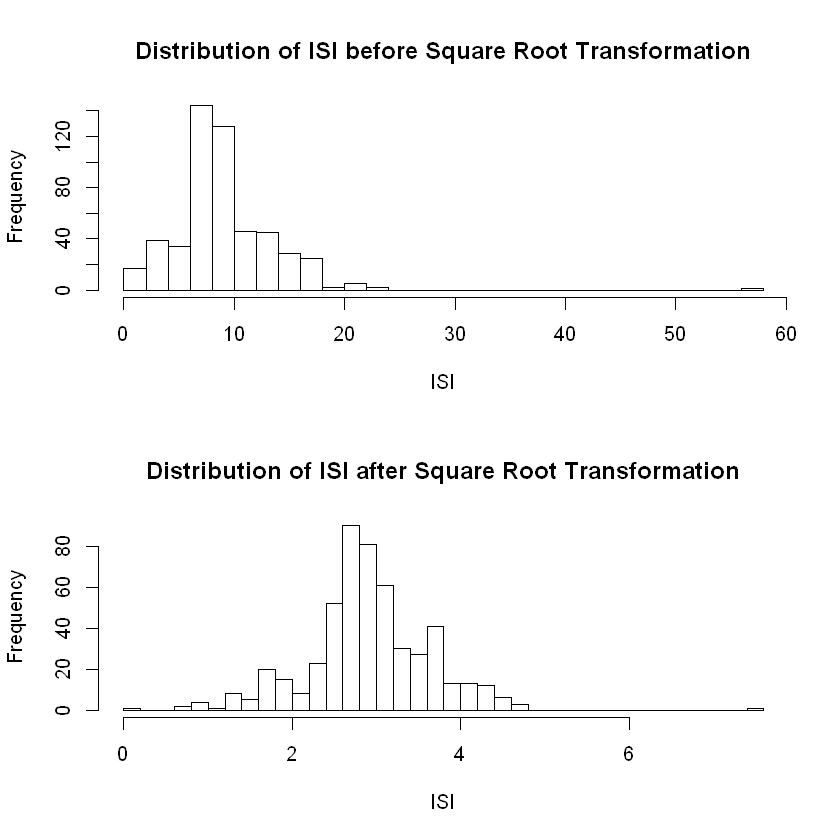

In [11]:
par(mfrow = c(2,1)) 
# plot the distribution of variable
hist(df$ISI,30,main = "Distribution of ISI before Square Root Transformation", xlab = "ISI")
# plot the distribution of variable
hist(sqrt(df$ISI),30,main = "Distribution of ISI after Square Root Transformation", xlab = "ISI")

In [12]:
cat("SKEWNESS level has reduced or improved from",skewness((df$ISI)),"to",skewness(sqrt(df$ISI)))

SKEWNESS level has reduced or improved from 2.521627 to 0.1471791

<u>FFMC</u>

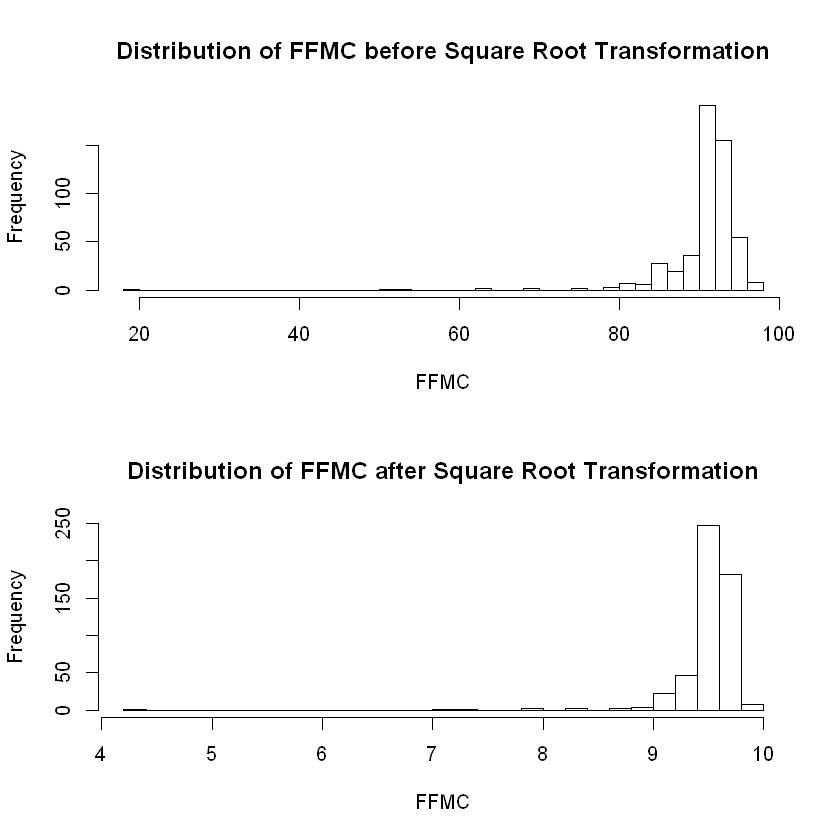

In [13]:
par(mfrow = c(2,1)) 
# plot the distribution of variable
hist(df$FFMC,30,main = "Distribution of FFMC before Square Root Transformation", xlab = "FFMC")
# plot the distribution of variable
hist(sqrt(df$FFMC),30,main = "Distribution of FFMC after Square Root Transformation", xlab = "FFMC")

In [14]:
cat("\nSKEWNESS level has not improved and it increased from",skewness((df$FFMC)),"to",skewness(sqrt(df$FFMC)))
cat("\nSKEWNESS level has not improved in the case of log transformation as well and it increased from",
    skewness((df$FFMC)),"to",skewness(log(df$FFMC)))


SKEWNESS level has not improved and it increased from -6.537499 to -8.710686
SKEWNESS level has not improved in the case of log transformation as well and it increased from -6.537499 to -11.74891

<u>DMC</u>

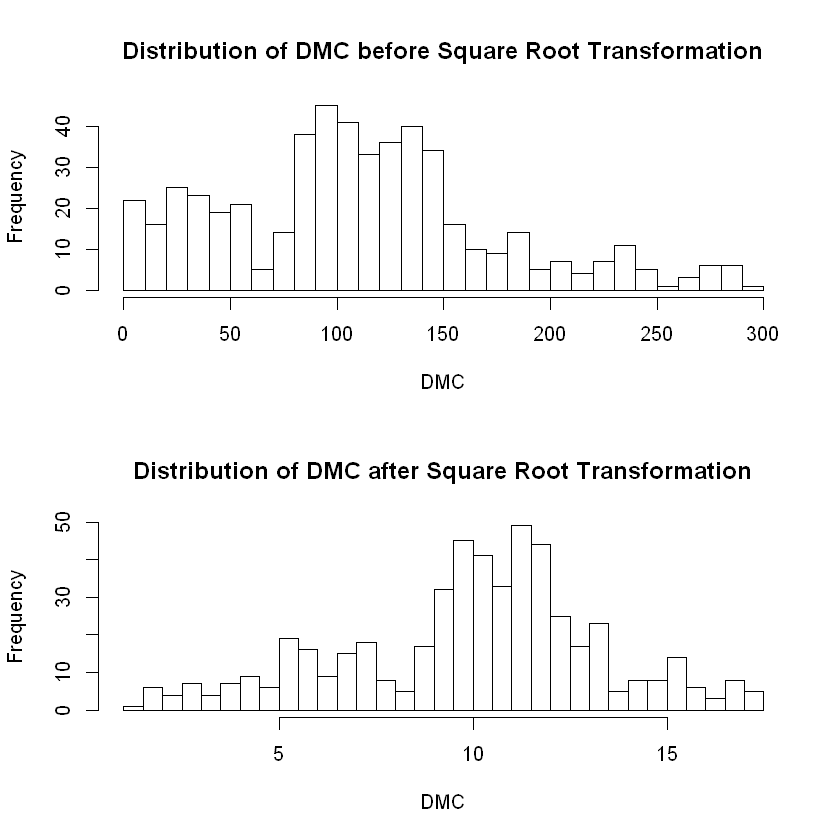

In [15]:
par(mfrow = c(2,1)) 
# plot the distribution of variable
hist(df$DMC,30,main = "Distribution of DMC before Square Root Transformation", xlab = "DMC")
# plot the distribution of variable
hist(sqrt(df$DMC),30,main = "Distribution of DMC after Square Root Transformation", xlab = "DMC")

In [16]:
cat("\nSKEWNESS level has improved little bit and it increased from",skewness((df$DMC)),"to",skewness(sqrt(df$DMC)))
cat("\nSKEWNESS level has not improved in the case of log transformation as well and it increased from",
    skewness((df$DMC)),"to",skewness(log(df$DMC)))


SKEWNESS level has improved little bit and it increased from 0.5443249 to -0.377759
SKEWNESS level has not improved in the case of log transformation as well and it increased from 0.5443249 to -1.683287

<u>DC</u>

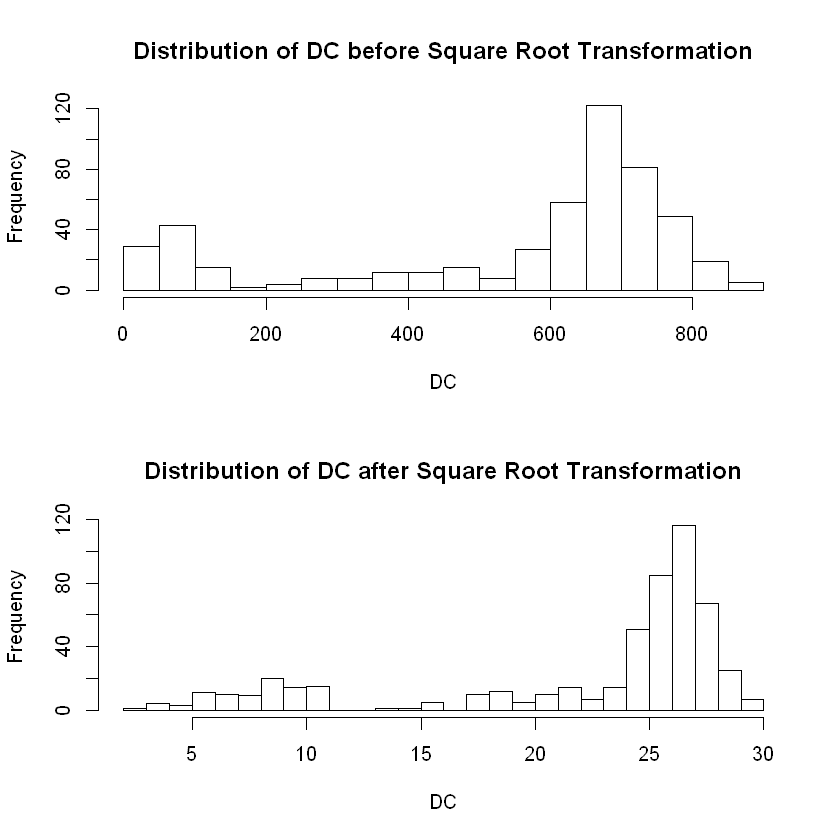

In [17]:
par(mfrow = c(2,1)) 
# plot the distribution of variable
hist(df$DC,30,main = "Distribution of DC before Square Root Transformation", xlab = "DC")
# plot the distribution of variable
hist(sqrt(df$DC),30,main = "Distribution of DC after Square Root Transformation", xlab = "DC")

In [18]:
cat("\nSKEWNESS level has not improved and it increased from",skewness((df$DC)),"to",skewness(sqrt(df$DC)))
cat("\nSKEWNESS level has not improved in the case of log transformation as well and it increased from",
    skewness((df$DC)),"to",skewness(log(df$DC)))


SKEWNESS level has not improved and it increased from -1.094068 to -1.401266
SKEWNESS level has not improved in the case of log transformation as well and it increased from -1.094068 to -1.875008

<u>Rain</u>

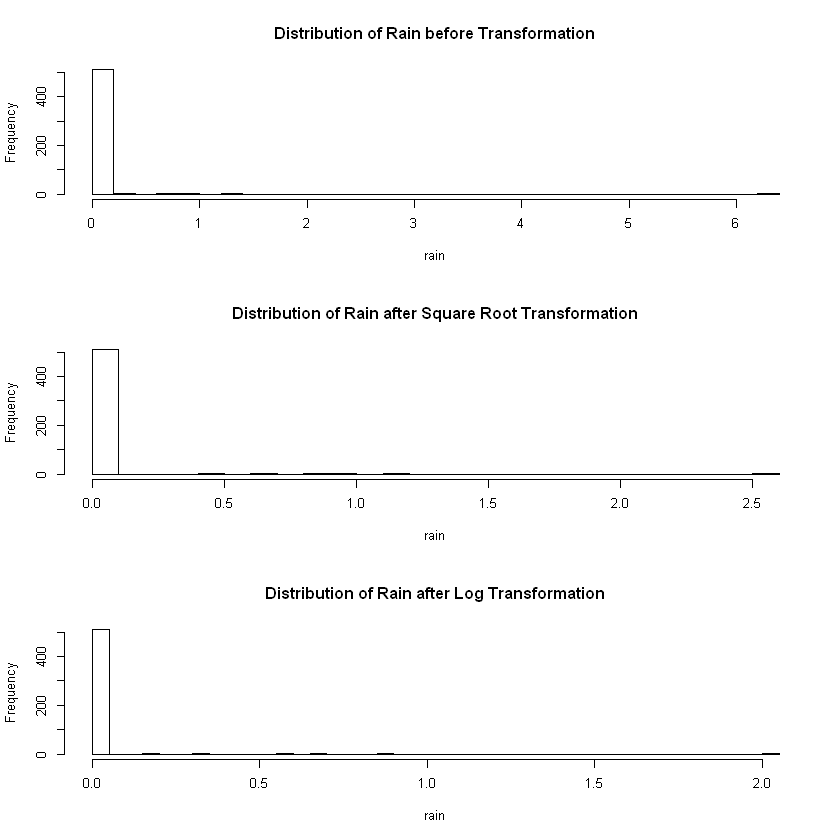

In [19]:
par(mfrow = c(3,1)) 
# plot the distribution of variable
hist(df$rain,30,main = "Distribution of Rain before Transformation", xlab = "rain")
# plot the distribution of variable
hist(sqrt(df$rain),30,main = "Distribution of Rain after Square Root Transformation", xlab = "rain")
# plot the distribution of variable
hist(log(df$rain+1),30,main = "Distribution of Rain after Log Transformation", xlab = "rain")

In [20]:
cat("\nSKEWNESS level has improved and it increased from",skewness((df$rain)),"to",skewness(sqrt(df$rain)))
cat("\nSKEWNESS level has improved in the case of log transformation as well and it increased from",
        skewness((df$rain)),"to",skewness(log(df$rain+1)))


SKEWNESS level has improved and it increased from 19.7015 to 12.42046
SKEWNESS level has improved in the case of log transformation as well and it increased from 19.7015 to 14.09089

<u>RH</u>

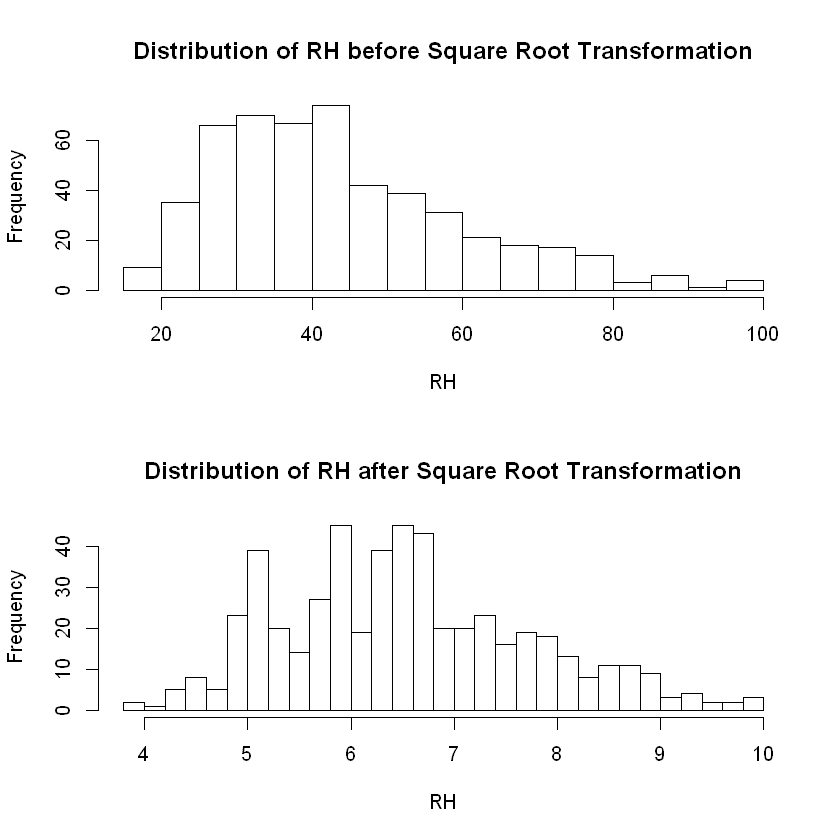

In [21]:
par(mfrow = c(2,1)) 
# plot the distribution of variable
hist(df$RH,30,main = "Distribution of RH before Square Root Transformation", xlab = "RH")
# plot the distribution of variable
hist(sqrt(df$RH),30,main = "Distribution of RH after Square Root Transformation", xlab = "RH")

In [22]:
cat("\nSKEWNESS level has improved and it increased from",skewness((df$RH)),"to",skewness(sqrt(df$RH)))
cat("\nSKEWNESS level has improved in the case of log transformation as well and it increased from",
    skewness((df$RH)),"to",skewness(log(df$RH)))


SKEWNESS level has improved and it increased from 0.8579033 to 0.4474247
SKEWNESS level has improved in the case of log transformation as well and it increased from 0.8579033 to 0.02778143

<b>Summary of Transformation</b><br>

We could understand that some variables has improved its skewness value applying Log and Square root transformation also there some variables does show a good skewness value instead there skewness increased.
<br>So we conclude from this section that not all variables must or can undergo transformations.

<b><u>Outlier Detection</u></b>

From the above section we were able to see that few variables in the dataset have outliers. But there is problem we simply can't remove all the outliers because of the outliers records can be influential in predicting the burned area. In order to find the influential outliers and keeping it and removing all other records we have apply special methods.`Cooks Distance` method is one such that helps us to find out the influential and non-influential outliers.

Cook’s distance is used in Regression Analysis to find influential outliers in a set of predictor variables. In other words, it’s a way to identify points that negatively affect your regression model. The measurement is a combination of each observation’s leverage and residual values; the higher the leverage and residuals, the higher the Cook’s distance.[1]

Steps to perform outlier detection:
1. Build a Linear Regression Model by supplying the full dataset
2. Using the function `cooks.distance` find the cooks distance for all the records
3. Filter out the distances that satisfy the condition distance >(4*mean(cooks distances))
4. Plot the same and show the removed records

In [23]:
outliear_model <- lm(area ~ .,data = df)
cooks_distnace <- cooks.distance(outliear_model)

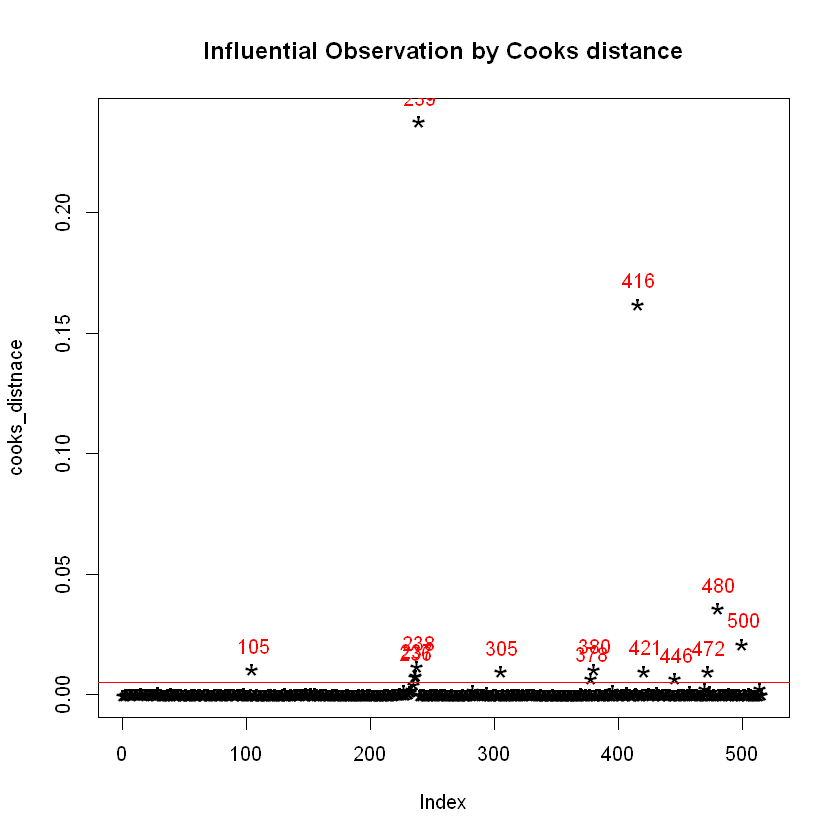

In [24]:
# plot cook's distance
plot(cooks_distnace,pch='*',cex=2, main="Influential Observation by Cooks distance") 
# add cutoff line
abline(h = 4*mean(cooks_distnace, na.rm=T), col="red")  
# add labels
text(x=1:length(cooks_distnace)+1, 
     y=cooks_distnace+0.01, labels=ifelse(cooks_distnace>4*mean(cooks_distnace, na.rm=T),names(cooks_distnace),""), col="red")  

Records that needs to be removed from the dataset by cooks distance

In [25]:
influ_condition <- which(cooks_distnace > 4*mean(cooks_distnace,na.rm=T))
outlier_df <- df[influ_condition,]
outlier_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
105,2,4,jan,sat,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00
236,8,6,aug,sun,91.4,142.4,601.4,10.6,19.6,41,5.8,0.0,196.48
237,2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94
238,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
239,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
305,6,5,may,sat,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0,0.00
378,2,2,aug,sat,93.7,231.1,715.1,8.4,21.9,42,2.2,0.0,174.63
380,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00
416,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28


<b><u>Investigation on categorial variables</u></b>

We look into how the `day` and `month` variables affect the burned area. This is done to understand whether these categorial variables has any dependence over the target variable so that we could decide to remove from our model or not.<br>
Logically speaking `day` usaually cannot be considered as a big factor in the predicting the burned area because predicting on which day fire is going to happen is near impossible task. Hence, we could stop considering the day variable.

In [26]:
numerical_variables <- c('X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area')
non_numerical_variables <- c('month','days')

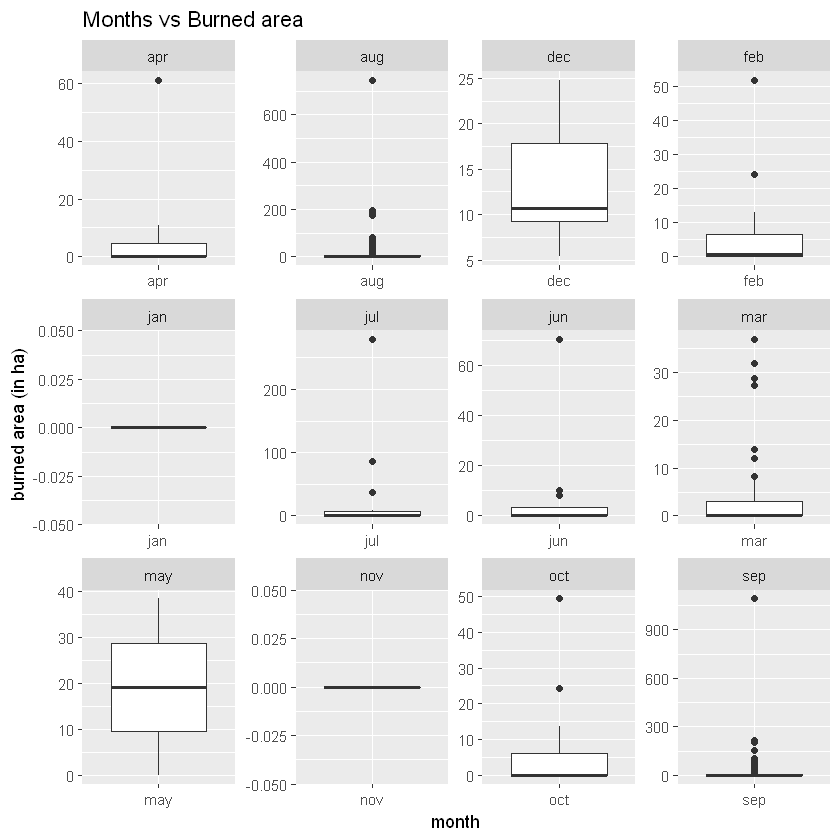

In [27]:
ggplot(df,aes(df$month,df$area)) + geom_boxplot()+facet_wrap(df$month ~ ., scales="free") + 
labs(x = "month", y = " burned area (in ha)", title = "Months vs Burned area")

<h4>Observation from the graphs</h4>

* In June, July, Auguest and September has recorded the highest burned area(in ha).
* November and January has recored zero burned areas.
<br>
<br>
We could conclude that `month` variable is very much contributing factor in predicting the burned area.

Normally if the months that show highest burned area must have a high temperature. Let see if this logical is true by plotting boxplot on month and temperature.

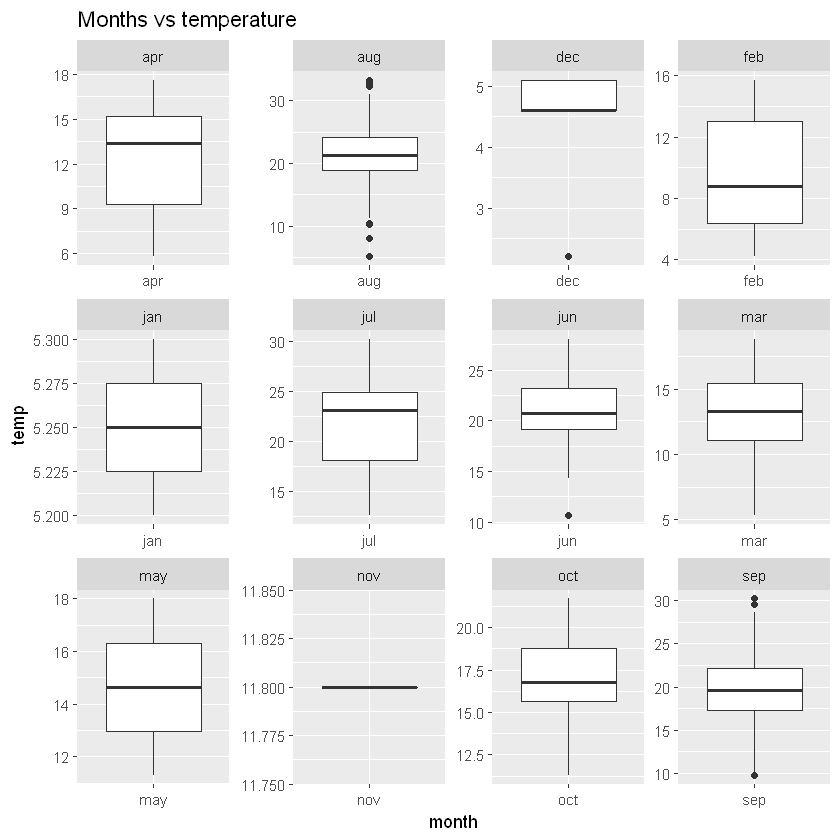

In [28]:
ggplot(df,aes(df$month,df$temp)) + geom_boxplot()+facet_wrap(df$month ~ ., scales="free") + 
labs(x = "month", y = " temp", title = "Months vs temperature")

The plot between the temperature and month has supported the statement we mentioned above which says months like June,July,Augest and September had recorded the maximum burned area. So the maximum burned area definitely would mean that temperature is be higher compared with other months. So with this graph we could prove the above mentioned months had recorded max amount of burned area. This also says that there is relationship between `temp` and `month` which can help in predicting the burned area.

<h4>Target Variable Analysis</h4>

Let look the distribution of target variable.

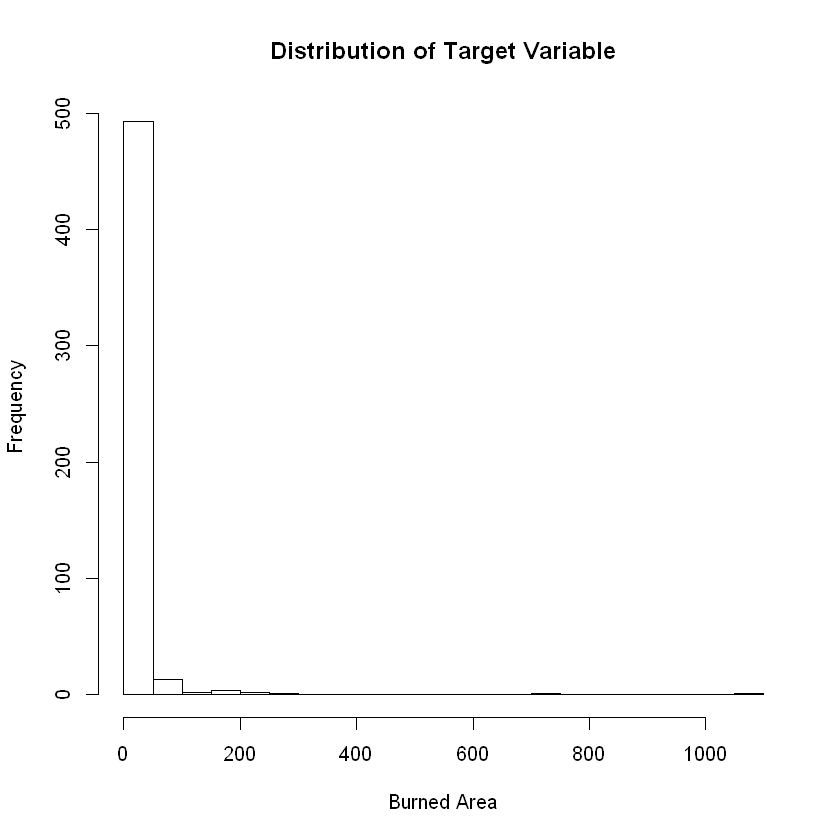

In [29]:
# plot the distribution of target variable
hist(df$area,30,main = "Distribution of Target Variable", xlab = "Burned Area")

In [30]:
cat("SKEWNESS :",skewness(df$area))

SKEWNESS : 12.77248

From the graph we could see and understand that the `target variable` is skewed towards left meaning its positivly skewed which can be clearl understood from the skewness value.

<u>Log Transformation</u>

Now let remove this the skewness from the target variable by `log transformation`. So we replace all the positive values with log of that value and all other below and equal to zero is replaced with NA.

In [31]:
df_log <- data.frame(df)
df_log$area_log <- ifelse(df_log$area >0, log(df_log$area),NA)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


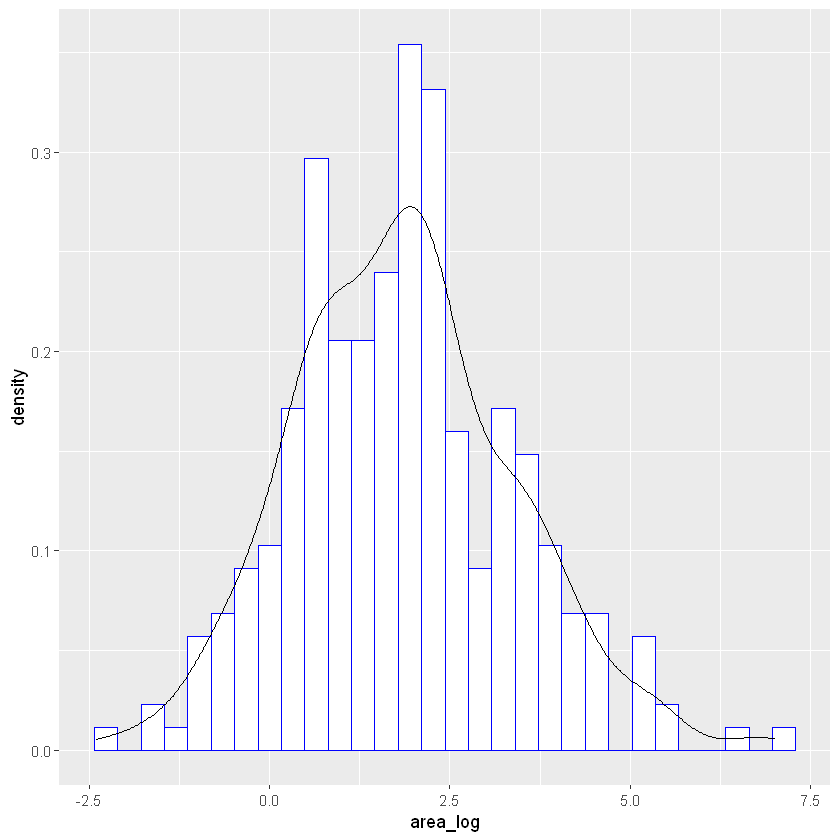

In [32]:
# plot the distribution of target variable
d1 <- df_log %>% filter(!is.na(df_log$area_log))
ggplot(df_log, aes(x = area_log)) + geom_histogram(aes(y = ..density..),fill='white',colour = 'blue') + geom_density() 

In [33]:
cat("SKEWNESS :", skewness(d1$area_log))

SKEWNESS : 0.2964892

After Log transformation the positive skewness is removed and the distribution of target variable is now normally distributed with skewness value very small which is close to 0.

<u>Z score Transformation</u>

In [34]:
df$area_zscore <-scale(df$area,center= TRUE, scale=TRUE)

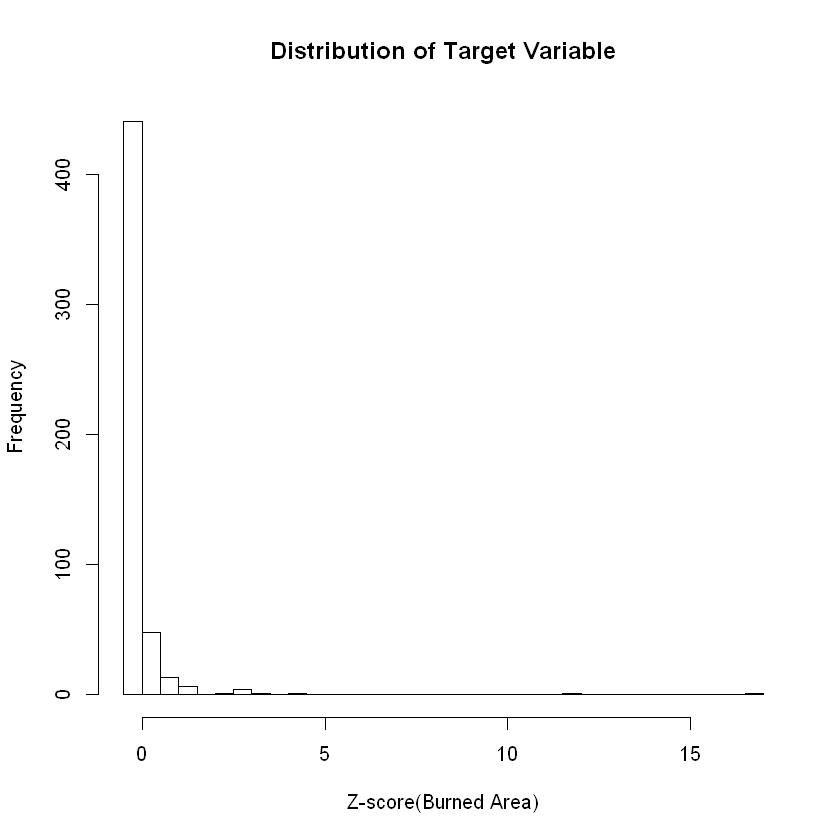

In [35]:
# plot the distribution of target variable
hist(df$area_zscore,30,main = "Distribution of Target Variable", xlab = "Z-score(Burned Area)") 
df$area_zscore <- NULL

Clearly we understand that there no different with original distribution of the target variable other than the scale.

<h6>So we conclude the Log Transformation has helped the target variable to be normally distributed and reduce the skewness.</h6>

<b>2.4.2 Two Variable Analysis</b>

After performing the single variable analysis the next important action is to find the relationships that exists among variables. These relationships help us eliminate unnecessary variables that does't help in predicting the target variable.

<u>Correlation Coefficients</u>

First we check the correlation coefficients for all pairs of variables

If the correlation value is positive it means that the both variables move in tandem—that is, in the same direction whereas the correlation value is negative means the relationship between two variables in which one variable increases as the other decreases, and vice versa.
<br>

In [36]:
predictor_variables <-  c(1,2,seq(5,12))
cor(df[,numerical_variables])

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000000,0.539548171,-0.02103927,-0.048384178,-0.08591612,0.006209941,-0.05125826,0.08522319,0.01879782,0.065387168,0.063385299
Y,0.539548171,1.000000000,-0.04630755,0.007781561,-0.10117777,-0.024487992,-0.02410308,0.06222073,-0.02034085,0.033234103,0.044873225
FFMC,-0.021039272,-0.046307546,1.00000000,0.382618800,0.33051180,0.531804931,0.43153226,-0.30099542,-0.02848481,0.056701533,0.040122004
DMC,-0.048384178,0.007781561,0.38261880,1.000000000,0.68219161,0.305127835,0.46959384,0.07379494,-0.10534225,0.074789982,0.072994296
DC,-0.085916123,-0.101177767,0.33051180,0.682191612,1.00000000,0.229154169,0.49620805,-0.03919165,-0.20346569,0.035860862,0.049383225
ISI,0.006209941,-0.024487992,0.53180493,0.305127835,0.22915417,1.000000000,0.39428710,-0.13251718,0.10682589,0.067668190,0.008257688
temp,-0.051258262,-0.024103084,0.43153226,0.469593844,0.49620805,0.394287104,1.00000000,-0.52739034,-0.22711622,0.069490547,0.097844107
RH,0.085223194,0.062220731,-0.30099542,0.073794941,-0.03919165,-0.132517177,-0.52739034,1.00000000,0.06941007,0.099751223,-0.075518563
wind,0.018797818,-0.020340852,-0.02848481,-0.105342253,-0.20346569,0.106825888,-0.22711622,0.06941007,1.00000000,0.061118880,0.012317277
rain,0.065387168,0.033234103,0.05670153,0.074789982,0.03586086,0.067668190,0.06949055,0.09975122,0.06111888,1.000000000,-0.007365729


This shows the correlation values between all the variables with each other.<br><br> The function below show the top best correlations between the variables.

In [37]:
# function to find the top correlation values
correlated_variables <- function(mydataframe,num_of_records)
  {
     # find the correlations
     cormatrix <- cor(mydataframe)
     # set the correlations on the diagonal or lower triangle to zero,
     # so they will not be reported as the highest ones:
     diag(cormatrix) <- 0
     cormatrix[lower.tri(cormatrix)] <- 0
     # flatten the matrix into a dataframe for easy sorting
     fm <- as.data.frame(as.table(cormatrix))
     # assign human-friendly names
     names(fm) <- c("First Variable", "Second Variable","Correlation Value")
     # sort and print the top n correlations
     head(fm[order(abs(fm$Correlation),decreasing=T),],n=num_of_records)
  }
correlated_variables(df[,-c(3,4)],20)

,First Variable,Second Variable,Correlation Value
,<fct>,<fct>,<dbl>
48,DMC,DC,0.68219161
12,X,Y,0.53954817
58,FFMC,ISI,0.53180493
84,temp,RH,-0.52739034
71,DC,temp,0.49620805
70,DMC,temp,0.46959384
69,FFMC,temp,0.43153226
72,ISI,temp,0.39428710
36,FFMC,DMC,0.38261880


Next we will look at the different ways of graphical representation of correlation between the variables.

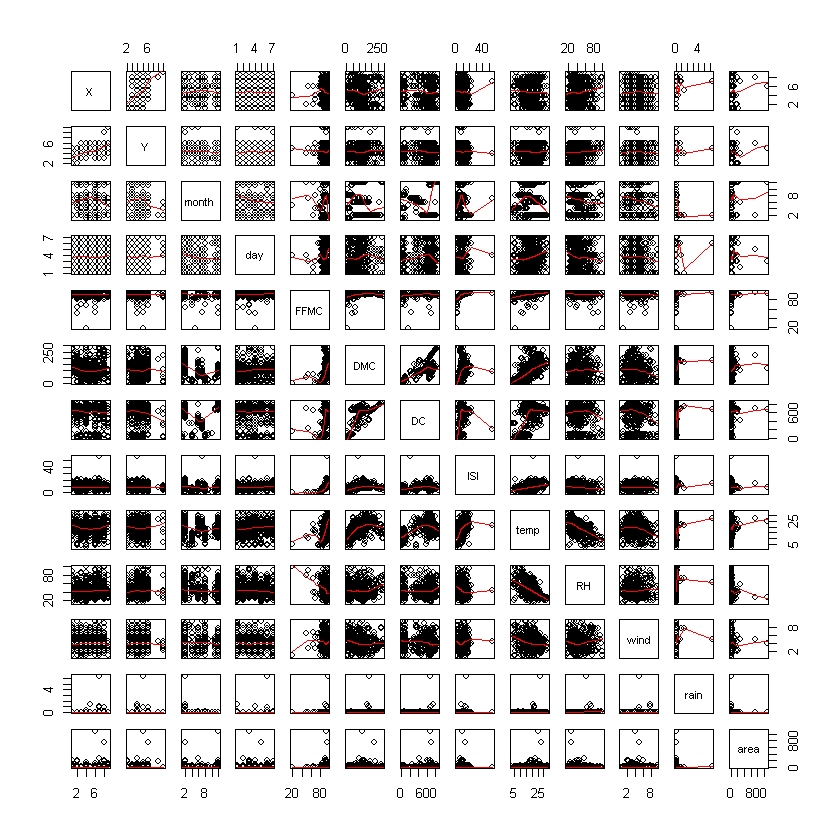

In [38]:
pairs(df,panel = panel.smooth)

In [39]:
# DIY correlation plot
colorRange <- c('#69091e', '#e37f65', 'white', '#aed2e6', '#042f60')
## colorRamp() returns a function which takes as an argument a number
## on [0,1] and returns a color in the gradient in colorRange
myColorRampFunc <- colorRamp(colorRange)

panel.cor <- function(w, z, ...) {
    correlation <- cor(w, z)

    ## because the func needs [0,1] and cor gives [-1,1], we need to shift and scale it
    col <- rgb(myColorRampFunc((1 + correlation) / 2 ) / 255 )

    ## square it to avoid visual bias due to "area vs diameter"
    radius <- sqrt(abs(correlation))
    radians <- seq(0, 2*pi, len = 50) # 50 is arbitrary
    x <- radius * cos(radians)
    y <- radius * sin(radians)
    ## make them full loops
    x <- c(x, tail(x,n=1))
    y <- c(y, tail(y,n=1))

    par(new=TRUE)
    plot(0, type='n', xlim=c(-1,1), ylim=c(-1,1), axes=FALSE, asp=1)
    polygon(x, y, border=col, col=col)
}

* Blue colour indicates the `+ve` correlation
* Red colour indicates the `-ve` correlation
* White colour indicates absolutly no correlation(exactly the same)

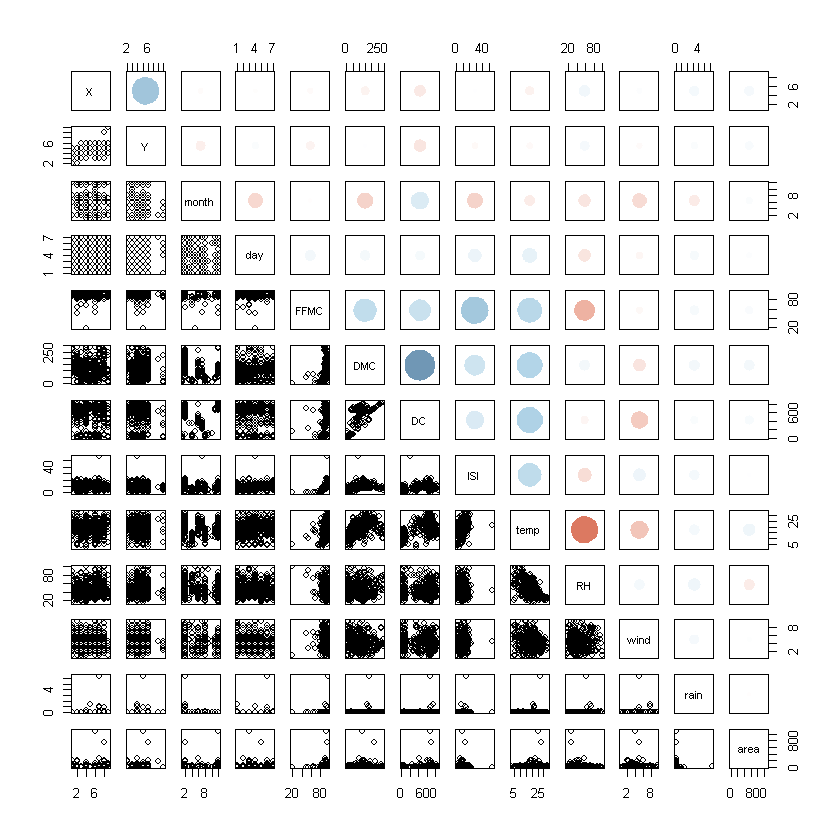

In [40]:
pairs(df[,seq(1,13)], upper.panel=panel.cor)

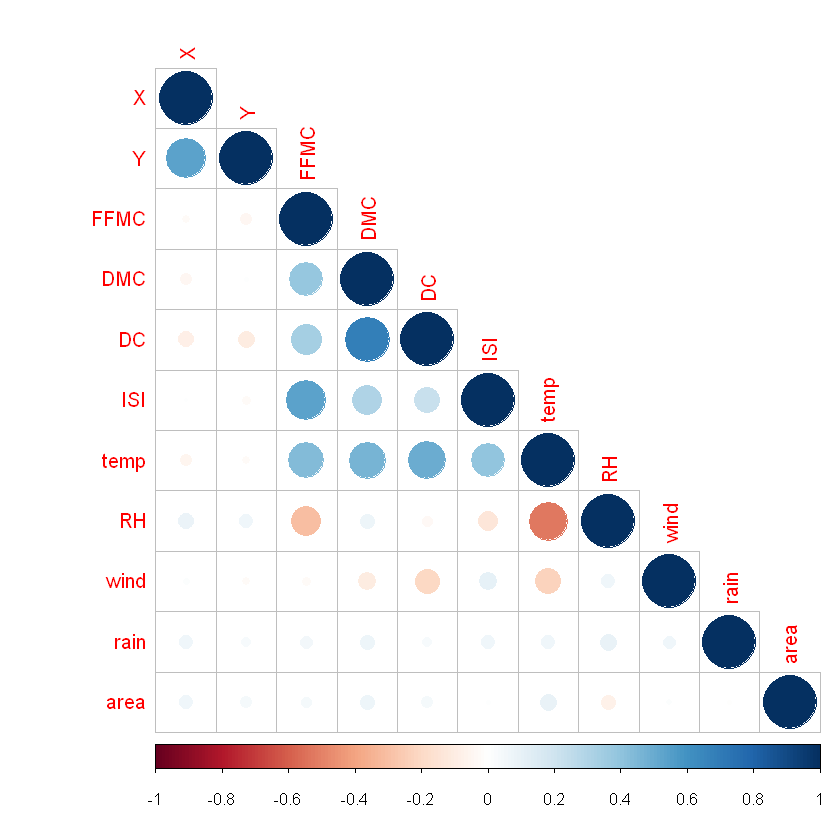

In [41]:
corrplot(cor(df[,numerical_variables]), method = 'circle', type='lower' )

##### Insights from all the correlation plots and table:

* `x-axis` and `y-axis` have a good +ve correlation (which is expected from both since it is coordinates)
* `month` shows correlation with DMC, DC, ISI, Temp, RH, Wind and Rain
*  `day` doesn't show any correlation with Methorological variables or FWI variables but as fairly good correlation with month.
*  `FFMC`, `DMC`, `DC`, `ISI` have strong correlation with `temp`, so `temp` could be used to represent them in models and also avoid the problem of multicollinearity.
*  `temp` have strong correlation with `RH` and fairly good correlation with `wind`

<h4>2.5 Inference from Exploratory Data Analysis study</h4>

The following inference is made after the above study on variables and there relations:

- Spatial corridnates shows good correlation with each other as expected and fairly good correlation with the burned area.

- From all the correation plots and table we could see that `temp` shows a good coorelation with the the forest fire index variables. Also the forest fire index has no noticible corelation with the target variables we can exclude these predictor when building the prediction model.

- Temporal variables shows good correlation with each other but `day` does shows very poor correlation with rest of variables in the dataset. It can also be noted that `month` shows good amount of correlation with all the forest fire index and temperature. As stated above it doesn't show good relation with the target variable hence we could remove it when building prediction model.

- We could say that all the good correlation with each other and also with target variable.

Based on these inference from the EDA few variables are selected that might help in model development.

###### Selected Variables for building a model is : 
1. X
2. Y
3. temp
4. RH
5. wind
6. rain



## 3. Model Development<a class="anchor" id="sec_3"></a>

As the number of predictor variables increases the training time for prediction also increases. If the number of input variables is increase, there is high chance for overfitting. So we have to choose the features that helps in improving the model to predict and reduce the error.

In this section we will perform 2 main steps:<br>
- 1. Select the best combination of features<br>
- 2. Build different models using the set of features selected from step 1.

#### 3.1 Feature Selection

In order to perform feature selection we are going to create Baseline linear regression models which helps us to choose the features. Once we have created model we look into the adjusted R square value and residual error and choose the model with best adjusted R sqaure value & minimum residual error.
<br>
We will build linear regression models with full dataset, outlier removed dataset, predictors selected from EDA, transformed dataset with selected predictors from EDA and other combinations. 


We have 2 categorical features in our dataset. In order to perform feature selection and building models we will have to convert this categorical features into some form of numerical representation. We can perform dummy coding in order to convert categorical into numerical form.

In [42]:
df1 <- cbind(df,dummy(c("month"),data=df))
final_df <- cbind(df1,dummy(c("day"),data=df1))
final_df$month <- NULL
final_df$day <- NULL
final_df <- final_df[,c(1,2,seq(12,30),3,4,5,6,7,8,9,10,11)]

In [43]:
full_data <- final_df
full_data_withoutoutliers = final_df[-influ_condition,]

Dataframe `full_data` has all the columns and dummy code converted columns.<br>
Dataframe `full_data_withoutliers` has the above mentioned same and it also has removed the outliers.

<u>Baseline Linear Models</u>

<b>Model 1</b>

We will be using the all the predictor variables for building this model.

<b>Target variable</b> : area <br>
<b>predictors</b>      : X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain

In [44]:
# training the linear model with data
linear_regression_model_1 <- lm(area ~ ., data = full_data)
# summary stats of model 
summary(linear_regression_model_1)


Call:
lm(formula = area ~ ., data = full_data)

Residuals:
    Min      1Q  Median      3Q     Max 
 -55.32  -17.84   -6.82    4.99 1039.28 

Coefficients: (2 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  64.04704   89.13994   0.718  0.47279   
X             2.25583    1.49786   1.506  0.13270   
Y            -0.14765    2.81881  -0.052  0.95825   
monthapr    -73.73192   42.67672  -1.728  0.08468 . 
monthaug    -26.84987   10.36236  -2.591  0.00985 **
monthdec    -26.35371   33.57509  -0.785  0.43288   
monthfeb    -68.14207   39.39749  -1.730  0.08433 . 
monthjan    -58.96283   63.68565  -0.926  0.35498   
monthjul    -44.85303   20.43724  -2.195  0.02866 * 
monthjun    -67.01644   29.41031  -2.279  0.02312 * 
monthmar    -77.95448   36.57680  -2.131  0.03357 * 
monthmay    -60.93546   56.92656  -1.070  0.28496   
monthnov    -78.14202   73.66691  -1.061  0.28933   
monthoct     -4.75655   18.45683  -0.258  0.79674   
monthse

<b>Performing Step function to select best features</b>

Features selected from `step` function after supplying the linear model created with full data and no transformations.

In [45]:
step(linear_regression_model_1,method='forward')

Start:  AIC=4325.48
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    monthsep + dayfri + daymon + daysat + daysun + daythu + daytue + 
    daywed + FFMC + DMC + DC + ISI + temp + RH + wind + rain


Step:  AIC=4325.48
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    monthsep + dayfri + daymon + daysat + daysun + daythu + daytue + 
    FFMC + DMC + DC + ISI + temp + RH + wind + rain


Step:  AIC=4325.48
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    dayfri + daymon + daysat + daysun + daythu + daytue + FFMC + 
    DMC + DC + ISI + temp + RH + wind + rain

           Df Sum of Sq     RSS    AIC
- daysun    1       3.7 1995144 4323.5
- daymon    1       7.1 1995148 4323.5
- Y         1      11.2 199515


Call:
lm(formula = area ~ X + daysat + temp, data = full_data)

Coefficients:
(Intercept)            X       daysat         temp  
    -18.369        1.827       14.276        1.078  


In [46]:
step(linear_regression_model_1,method='backward')

Start:  AIC=4325.48
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    monthsep + dayfri + daymon + daysat + daysun + daythu + daytue + 
    daywed + FFMC + DMC + DC + ISI + temp + RH + wind + rain


Step:  AIC=4325.48
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    monthsep + dayfri + daymon + daysat + daysun + daythu + daytue + 
    FFMC + DMC + DC + ISI + temp + RH + wind + rain


Step:  AIC=4325.48
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    dayfri + daymon + daysat + daysun + daythu + daytue + FFMC + 
    DMC + DC + ISI + temp + RH + wind + rain

           Df Sum of Sq     RSS    AIC
- daysun    1       3.7 1995144 4323.5
- daymon    1       7.1 1995148 4323.5
- Y         1      11.2 199515


Call:
lm(formula = area ~ X + daysat + temp, data = full_data)

Coefficients:
(Intercept)            X       daysat         temp  
    -18.369        1.827       14.276        1.078  


In [47]:
step(linear_regression_model_1,method='both')

Start:  AIC=4325.48
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    monthsep + dayfri + daymon + daysat + daysun + daythu + daytue + 
    daywed + FFMC + DMC + DC + ISI + temp + RH + wind + rain


Step:  AIC=4325.48
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    monthsep + dayfri + daymon + daysat + daysun + daythu + daytue + 
    FFMC + DMC + DC + ISI + temp + RH + wind + rain


Step:  AIC=4325.48
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    dayfri + daymon + daysat + daysun + daythu + daytue + FFMC + 
    DMC + DC + ISI + temp + RH + wind + rain

           Df Sum of Sq     RSS    AIC
- daysun    1       3.7 1995144 4323.5
- daymon    1       7.1 1995148 4323.5
- Y         1      11.2 199515


Call:
lm(formula = area ~ X + daysat + temp, data = full_data)

Coefficients:
(Intercept)            X       daysat         temp  
    -18.369        1.827       14.276        1.078  


Features from the step function is selected on the basis of lower AIC value. All of the 3 step functions gave the same answer that is choose `X` + `daysat` + `temp` as predictor variables.

<b>Model 2</b>

Performing Linear regression on features selected from the step function

<b>Target variable</b> :area<br>
<b>predictors</b>      : X,daysat,temp( selected from step function)

In [48]:
# training the linear model with data
linear_regression_model_2 <- lm(area ~ X+daysat+temp, data = full_data)
# summary stats of model 
summary(linear_regression_model_2)


Call:
lm(formula = area ~ X + daysat + temp, data = full_data)

Residuals:
    Min      1Q  Median      3Q     Max 
 -39.43  -15.25   -8.00   -0.60 1056.91 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -18.3695    11.2740  -1.629   0.1039  
X             1.8268     1.2038   1.518   0.1297  
daysat       14.2762     7.5379   1.894   0.0588 .
temp          1.0783     0.4798   2.247   0.0251 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 63.16 on 513 degrees of freedom
Multiple R-squared:  0.02111,	Adjusted R-squared:  0.01538 
F-statistic: 3.687 on 3 and 513 DF,  p-value: 0.01197


<b>Model 3</b>

In this model will be using the Log transformation on area which helps to normalize the distribution of area.

<b>Target variable</b> : log transformed area (in order to normalise the distribution) <br>
<b>predictors</b>      : X,daysat,temp( selected from step function)

In [49]:
# training the linear model with data
linear_regression_model_3 <- lm(log(area+1,10) ~ X+daysat+temp , data = full_data)
# summary stats of model 
summary(linear_regression_model_3)


Call:
lm(formula = log(area + 1, 10) ~ X + daysat + temp, data = full_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6160 -0.4684 -0.3058  0.3823  2.4519 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 0.285347   0.108274   2.635  0.00866 **
X           0.016810   0.011561   1.454  0.14655   
daysat      0.054055   0.072393   0.747  0.45559   
temp        0.005818   0.004608   1.262  0.20735   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6066 on 513 degrees of freedom
Multiple R-squared:  0.008141,	Adjusted R-squared:  0.00234 
F-statistic: 1.403 on 3 and 513 DF,  p-value: 0.2409


<b>Model 4</b>

In this we will build linear model with features selected from EDA.

<b>Target variable</b> : area<br>
<b>predictors</b>      : X,Y,temp,RH,wind,rain ( selected from EDA)

In [50]:
# training the linear model with data
linear_regression_model_4 <- lm(area ~ X+Y+wind+RH+temp+rain , data = full_data)
# summary stats of model 
summary(linear_regression_model_4)


Call:
lm(formula = area ~ X + Y + wind + RH + temp + rain, data = full_data)

Residuals:
    Min      1Q  Median      3Q     Max 
 -36.53  -15.03   -8.75   -1.23 1066.44 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -17.4771    22.2674  -0.785   0.4329  
X             1.7161     1.4400   1.192   0.2339  
Y             0.8725     2.7014   0.323   0.7468  
wind          1.2802     1.6123   0.794   0.4276  
RH           -0.1308     0.2052  -0.637   0.5242  
temp          1.0212     0.5891   1.733   0.0836 .
rain         -3.7287     9.6468  -0.387   0.6993  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 63.48 on 510 degrees of freedom
Multiple R-squared:  0.01693,	Adjusted R-squared:  0.005363 
F-statistic: 1.464 on 6 and 510 DF,  p-value: 0.1887


<b>Model 5</b>

We will try the same EDA selected features and Log transformed area.

<b>Target variable</b> : log transformed area (in order to normalise the distribution) <br>
<b>predictors</b>      : X,Y,temp,RH,wind,rain ( selected from EDA)

In [51]:
# training the linear model with data
linear_regression_model_5 <- lm(log(area+1,10) ~ X+Y+wind+RH+temp+rain , data = full_data)
# summary stats of model 
summary(linear_regression_model_5)


Call:
lm(formula = log(area + 1, 10) ~ X + Y + wind + RH + temp + rain, 
    data = full_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6739 -0.4713 -0.2893  0.3933  2.4725 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.231114   0.212686   1.087   0.2777  
X            0.015554   0.013754   1.131   0.2586  
Y            0.005771   0.025803   0.224   0.8231  
wind         0.027163   0.015400   1.764   0.0784 .
RH          -0.001412   0.001960  -0.720   0.4718  
temp         0.005650   0.005627   1.004   0.3158  
rain         0.029100   0.092141   0.316   0.7523  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6064 on 510 degrees of freedom
Multiple R-squared:  0.01475,	Adjusted R-squared:  0.003158 
F-statistic: 1.272 on 6 and 510 DF,  p-value: 0.2683


<b>StepAIC selection</b>

Interactions and transformation between the features must be considered. We can use stepAIC for this purpose. All transformations and interactions in the scope can be specified here.

In [52]:
stepAIC(linear_regression_model_1, scope = . ~ .^2, direction = 'forward')

Start:  AIC=4325.48
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    monthsep + dayfri + daymon + daysat + daysun + daythu + daytue + 
    daywed + FFMC + DMC + DC + ISI + temp + RH + wind + rain

                  Df Sum of Sq     RSS    AIC
+ monthsep:daysat  1     35124 1960017 4318.3
+ monthsep:DC      1     21884 1973257 4321.8
+ monthjul:daymon  1     18595 1976546 4322.6
+ DMC:RH           1     17575 1977566 4322.9
+ Y:RH             1     16181 1978959 4323.3
+ X:daythu         1     15662 1979478 4323.4
+ monthaug:daythu  1     14171 1980969 4323.8
+ Y:temp           1     13058 1982082 4324.1
+ daysat:RH        1     12816 1982325 4324.1
+ X:temp           1     12485 1982655 4324.2
+ Y:daythu         1     11254 1983886 4324.6
+ daythu:ISI       1     11171 1983969 4324.6
+ daythu:DMC       1     11119 1984021 4324.6
+ DMC:temp         1     10784 1984356 4324.7
+ DMC:DC        


Step:  AIC=4318.3
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    monthsep + dayfri + daymon + daysat + daysun + daythu + daytue + 
    daywed + FFMC + DMC + DC + ISI + temp + RH + wind + rain + 
    monthsep:daysat

                  Df Sum of Sq     RSS    AIC
+ monthsep:DC      1   21454.5 1938562 4314.6
+ Y:RH             1   16352.8 1943664 4316.0
+ monthjul:daymon  1   16253.4 1943763 4316.0
+ DMC:RH           1   16105.3 1943911 4316.0
+ X:temp           1   15633.6 1944383 4316.2
+ X:daythu         1   15014.2 1945002 4316.3
+ Y:temp           1   14547.8 1945469 4316.4
+ daythu:ISI       1   13092.6 1946924 4316.8
+ Y:daythu         1   11115.5 1948901 4317.4
+ X:RH             1   10783.7 1949233 4317.4
+ daythu:DMC       1    9947.1 1950069 4317.7
+ monthaug:DC      1    9865.9 1950151 4317.7
+ monthaug:daythu  1    9656.6 1950360 4317.7
+ DMC:temp         1    9392.6 1950624 4


Step:  AIC=4314.61
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    monthsep + dayfri + daymon + daysat + daysun + daythu + daytue + 
    daywed + FFMC + DMC + DC + ISI + temp + RH + wind + rain + 
    monthsep:daysat + monthsep:DC

                  Df Sum of Sq     RSS    AIC
+ Y:RH             1   17951.5 1920611 4311.8
+ monthjul:daymon  1   15520.9 1923041 4312.5
+ X:daythu         1   15404.8 1923157 4312.5
+ X:temp           1   14846.4 1923716 4312.6
+ Y:temp           1   13954.9 1924607 4312.9
+ DMC:RH           1   12459.1 1926103 4313.3
+ Y:daythu         1   10891.1 1927671 4313.7
+ X:RH             1   10448.7 1928113 4313.8
+ daythu:ISI       1   10293.0 1928269 4313.9
+ daythu:wind      1    8245.1 1930317 4314.4
+ monthaug:daythu  1    8048.2 1930514 4314.5
+ daythu:DMC       1    7993.0 1930569 4314.5
+ temp:wind        1    7939.5 1930623 4314.5
<none>                   


Step:  AIC=4311.8
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    monthsep + dayfri + daymon + daysat + daysun + daythu + daytue + 
    daywed + FFMC + DMC + DC + ISI + temp + RH + wind + rain + 
    monthsep:daysat + monthsep:DC + Y:RH

                  Df Sum of Sq     RSS    AIC
+ monthjul:daymon  1   17171.2 1903439 4309.2
+ X:daythu         1   14692.5 1905918 4309.8
+ DMC:RH           1   13408.3 1907202 4310.2
+ Y:daythu         1    9865.8 1910745 4311.1
+ daythu:ISI       1    9077.0 1911534 4311.3
+ temp:wind        1    8932.4 1911678 4311.4
+ Y:wind           1    7884.1 1912726 4311.7
<none>                         1920611 4311.8
+ daythu:wind      1    7018.7 1913592 4311.9
+ daysat:RH        1    6646.7 1913964 4312.0
+ monthaug:daythu  1    6349.4 1914261 4312.1
+ daythu:DMC       1    5753.0 1914858 4312.2
+ X:wind           1    5645.8 1914965 4312.3
+ X:temp           


Step:  AIC=4309.15
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    monthsep + dayfri + daymon + daysat + daysun + daythu + daytue + 
    daywed + FFMC + DMC + DC + ISI + temp + RH + wind + rain + 
    monthsep:daysat + monthsep:DC + Y:RH + monthjul:daymon

                  Df Sum of Sq     RSS    AIC
+ X:daythu         1   15448.0 1887991 4306.9
+ DMC:RH           1   14100.3 1889339 4307.3
+ Y:daythu         1   10158.8 1893281 4308.4
+ daythu:ISI       1    9746.5 1893693 4308.5
+ temp:wind        1    7494.0 1895945 4309.1
<none>                         1903439 4309.2
+ daythu:wind      1    7130.5 1896309 4309.2
+ Y:wind           1    6989.0 1896450 4309.3
+ daysat:RH        1    6831.8 1896608 4309.3
+ monthaug:daythu  1    5949.1 1897490 4309.5
+ daythu:DMC       1    5661.7 1897778 4309.6
+ DC:RH            1    5110.5 1898329 4309.8
+ daythu:temp      1    5099.7 1898340 4309.8



Step:  AIC=4306.94
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    monthsep + dayfri + daymon + daysat + daysun + daythu + daytue + 
    daywed + FFMC + DMC + DC + ISI + temp + RH + wind + rain + 
    monthsep:daysat + monthsep:DC + Y:RH + monthjul:daymon + 
    X:daythu

                  Df Sum of Sq     RSS    AIC
+ DMC:RH           1   13554.8 1874437 4305.2
+ Y:wind           1    9435.7 1878556 4306.4
+ daythu:ISI       1    8535.3 1879456 4306.6
+ daythu:temp      1    7513.5 1880478 4306.9
<none>                         1887991 4306.9
+ temp:wind        1    6366.7 1881625 4307.2
+ monthaug:daythu  1    6298.8 1881693 4307.2
+ daysat:RH        1    6207.3 1881784 4307.2
+ daythu:DMC       1    5853.1 1882138 4307.3
+ X:wind           1    5539.6 1882452 4307.4
+ daythu:RH        1    5184.8 1882806 4307.5
+ daythu:wind      1    5088.6 1882903 4307.5
+ monthjul:RH      1    4755.2


Step:  AIC=4305.22
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    monthsep + dayfri + daymon + daysat + daysun + daythu + daytue + 
    daywed + FFMC + DMC + DC + ISI + temp + RH + wind + rain + 
    monthsep:daysat + monthsep:DC + Y:RH + monthjul:daymon + 
    X:daythu + DMC:RH

                  Df Sum of Sq     RSS    AIC
+ daythu:temp      1    9741.1 1864695 4304.5
+ daythu:ISI       1    9239.7 1865197 4304.7
+ Y:wind           1    9077.9 1865359 4304.7
+ monthaug:daythu  1    7594.9 1866842 4305.1
<none>                         1874437 4305.2
+ temp:wind        1    6432.6 1868004 4305.4
+ daythu:DMC       1    6272.9 1868164 4305.5
+ monthjul:RH      1    5403.3 1869033 4305.7
+ daythu:RH        1    5358.9 1869078 4305.7
+ daysat:RH        1    5323.0 1869114 4305.7
+ X:wind           1    5198.7 1869238 4305.8
+ X:temp           1    4930.9 1869506 4305.9
+ monthsep:DMC     1 


Step:  AIC=4304.52
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    monthsep + dayfri + daymon + daysat + daysun + daythu + daytue + 
    daywed + FFMC + DMC + DC + ISI + temp + RH + wind + rain + 
    monthsep:daysat + monthsep:DC + Y:RH + monthjul:daymon + 
    X:daythu + DMC:RH + daythu:temp

                  Df Sum of Sq     RSS    AIC
+ Y:wind           1    7895.9 1856800 4304.3
<none>                         1864695 4304.5
+ monthjul:RH      1    6876.8 1857819 4304.6
+ daysat:RH        1    6634.8 1858061 4304.7
+ temp:wind        1    6011.8 1858684 4304.9
+ daythu:wind      1    5348.0 1859347 4305.0
+ X:wind           1    4465.1 1860230 4305.3
+ X:temp           1    4333.4 1860362 4305.3
+ monthsep:DMC     1    4328.0 1860367 4305.3
+ monthjul:daythu  1    4266.2 1860429 4305.3
+ monthaug:daythu  1    4231.2 1860464 4305.3
+ monthjul:DC      1    4130.3 1860565 4305.4
+ month


Step:  AIC=4304.33
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    monthsep + dayfri + daymon + daysat + daysun + daythu + daytue + 
    daywed + FFMC + DMC + DC + ISI + temp + RH + wind + rain + 
    monthsep:daysat + monthsep:DC + Y:RH + monthjul:daymon + 
    X:daythu + DMC:RH + daythu:temp + Y:wind

                  Df Sum of Sq     RSS    AIC
+ daysat:RH        1    7364.4 1849435 4304.3
<none>                         1856800 4304.3
+ monthjul:RH      1    6837.6 1849962 4304.4
+ monthjul:DC      1    5814.9 1850985 4304.7
+ temp:wind        1    5305.4 1851494 4304.8
+ monthjul:daythu  1    5200.2 1851599 4304.9
+ monthaug:daythu  1    5151.0 1851648 4304.9
+ X:temp           1    4754.3 1852045 4305.0
+ monthsep:DMC     1    4754.1 1852045 4305.0
+ daythu:wind      1    4574.6 1852225 4305.1
+ monthjul:FFMC    1    4145.2 1852654 4305.2
+ monthjul:ISI     1    4083.3 1852716 4305.


Step:  AIC=4304.27
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    monthsep + dayfri + daymon + daysat + daysun + daythu + daytue + 
    daywed + FFMC + DMC + DC + ISI + temp + RH + wind + rain + 
    monthsep:daysat + monthsep:DC + Y:RH + monthjul:daymon + 
    X:daythu + DMC:RH + daythu:temp + Y:wind + daysat:RH

                  Df Sum of Sq     RSS    AIC
<none>                         1849435 4304.3
+ monthjul:RH      1    6100.5 1843335 4304.6
+ monthjul:DC      1    6035.1 1843400 4304.6
+ monthjun:daysat  1    5140.4 1844295 4304.8
+ monthjul:daythu  1    5010.8 1844424 4304.9
+ temp:wind        1    4652.1 1844783 4305.0
+ daythu:wind      1    4643.9 1844791 4305.0
+ monthsep:DMC     1    4586.7 1844848 4305.0
+ monthjul:ISI     1    4520.1 1844915 4305.0
+ monthaug:daythu  1    4398.8 1845036 4305.0
+ monthjul:FFMC    1    4366.6 1845069 4305.1
+ X:temp           1    4221.1 1


Call:
lm(formula = area ~ X + Y + monthapr + monthaug + monthdec + 
    monthfeb + monthjan + monthjul + monthjun + monthmar + monthmay + 
    monthnov + monthoct + monthsep + dayfri + daymon + daysat + 
    daysun + daythu + daytue + daywed + FFMC + DMC + DC + ISI + 
    temp + RH + wind + rain + monthsep:daysat + monthsep:DC + 
    Y:RH + monthjul:daymon + X:daythu + DMC:RH + daythu:temp + 
    Y:wind + daysat:RH, data = full_data)

Coefficients:
    (Intercept)                X                Y         monthapr  
      2.046e+02        1.270e+00        4.409e+00       -2.343e+02  
       monthaug         monthdec         monthfeb         monthjan  
     -2.104e+02       -2.097e+02       -2.421e+02       -2.425e+02  
       monthjul         monthjun         monthmar         monthmay  
     -2.307e+02       -2.341e+02       -2.431e+02       -2.112e+02  
       monthnov         monthoct         monthsep           dayfri  
     -2.358e+02       -1.840e+02               NA       -7.126e

<b>Model 6</b>

<b>Target variable</b> : log transformed area (in order to normalise the distribution) <br>
<b>predictors</b>: X, Y, monthapr, monthaug, monthdec, monthfeb, monthjan, monthjul, monthjun, monthmar, monthmay, monthnov, monthoct, monthsep, dayfri, daymon, daysat, daysun, daythu, daytue, daywed, FFMC, DMC, DC, ISI, temp, RH, wind, rain, monthsep:daysat, monthsep:DC, Y:RH, monthjul:daymon, X:daythu, DMC:RH, daythu:temp, Y:wind, daysat:RH<br>features from the stepAIC function above ( selected based on least AIC value)

In [53]:
# training the linear model with data
linear_regression_model_6 <- lm(formula = log(area+1,10) ~ X + Y + monthapr + monthaug + monthdec + 
    monthfeb + monthjan + monthjul + monthjun + monthmar + monthmay + 
    monthnov + monthoct + monthsep + dayfri + daymon + daysat + 
    daysun + daythu + daytue + daywed + FFMC + DMC + DC + ISI + 
    temp + RH + wind + rain + monthsep:daysat + monthsep:DC + 
    Y:RH + monthjul:daymon + X:daythu + DMC:RH + daythu:temp + 
    Y:wind + daysat:RH, data = full_data)
# summary stats of model 
summary(linear_regression_model_6)


Call:
lm(formula = log(area + 1, 10) ~ X + Y + monthapr + monthaug + 
    monthdec + monthfeb + monthjan + monthjul + monthjun + monthmar + 
    monthmay + monthnov + monthoct + monthsep + dayfri + daymon + 
    daysat + daysun + daythu + daytue + daywed + FFMC + DMC + 
    DC + ISI + temp + RH + wind + rain + monthsep:daysat + monthsep:DC + 
    Y:RH + monthjul:daymon + X:daythu + DMC:RH + daythu:temp + 
    Y:wind + daysat:RH, data = full_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0462 -0.4314 -0.1951  0.3611  2.1901 

Coefficients: (2 not defined because of singularities)
                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)     -6.569e-01  1.149e+00  -0.572  0.56772   
X                1.650e-02  1.453e-02   1.136  0.25641   
Y                1.180e-01  8.179e-02   1.443  0.14969   
monthapr        -2.768e-01  8.069e-01  -0.343  0.73168   
monthaug        -9.552e-02  8.087e-01  -0.118  0.90603   
monthdec         7.791e-01  8.325e-01   0.936  0.3

In [54]:
stepAIC(linear_regression_model_1, scope = . ~ .^2, direction = 'both')

Start:  AIC=4325.48
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    monthsep + dayfri + daymon + daysat + daysun + daythu + daytue + 
    daywed + FFMC + DMC + DC + ISI + temp + RH + wind + rain


Step:  AIC=4325.48
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    monthsep + dayfri + daymon + daysat + daysun + daythu + daytue + 
    FFMC + DMC + DC + ISI + temp + RH + wind + rain


Step:  AIC=4325.48
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    dayfri + daymon + daysat + daysun + daythu + daytue + FFMC + 
    DMC + DC + ISI + temp + RH + wind + rain

                  Df Sum of Sq     RSS    AIC
+ monthjul:daymon  1   18594.6 1976546 4322.6
+ DMC:RH           1   17574.8 1977566 4322.9
+ Y:RH   


Step:  AIC=4322.64
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    dayfri + daymon + daysat + daysun + daythu + daytue + FFMC + 
    DMC + DC + ISI + temp + RH + wind + rain + monthjul:daymon

                  Df Sum of Sq     RSS    AIC
+ DMC:RH           1   18200.2 1958346 4319.9
+ Y:RH             1   17930.4 1958615 4319.9
+ X:daythu         1   16491.7 1960054 4320.3
- Y                1       0.1 1976546 4320.6
- daysun           1      14.6 1976560 4320.6
- FFMC             1      82.6 1976628 4320.7
- monthoct         1     185.7 1976732 4320.7
- daytue           1     193.0 1976739 4320.7
+ Y:temp           1   14984.7 1961561 4320.7
- rain             1     349.4 1976895 4320.7
- daythu           1     450.2 1976996 4320.8
- RH               1     628.0 1977174 4320.8
- dayfri           1    1047.2 1977593 4320.9
+ monthaug:daythu  1   13458.9 1963087 4321.1
+ daysat:RH       


Step:  AIC=4319.86
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    dayfri + daymon + daysat + daysun + daythu + daytue + FFMC + 
    DMC + DC + ISI + temp + RH + wind + rain + monthjul:daymon + 
    DMC:RH

                  Df Sum of Sq     RSS    AIC
+ Y:RH             1   19277.5 1939068 4316.7
+ X:temp           1   16227.6 1942118 4317.6
+ X:daythu         1   15899.5 1942446 4317.6
+ Y:temp           1   15873.6 1942472 4317.6
+ monthaug:daythu  1   15346.2 1942999 4317.8
- monthoct         1       1.5 1958347 4317.9
- Y                1       5.7 1958351 4317.9
- daysun           1       8.7 1958354 4317.9
- FFMC             1       8.7 1958354 4317.9
- rain             1      13.0 1958359 4317.9
- daythu           1     116.3 1958462 4317.9
- daytue           1     155.7 1958501 4317.9
- dayfri           1    1006.7 1959352 4318.1
- temp             1    2015.2 1960361 4318.4
+ da


Step:  AIC=4316.74
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    dayfri + daymon + daysat + daysun + daythu + daytue + FFMC + 
    DMC + DC + ISI + temp + RH + wind + rain + monthjul:daymon + 
    DMC:RH + Y:RH

                  Df Sum of Sq     RSS    AIC
+ X:daythu         1     15153 1923915 4314.7
- rain             1         1 1939069 4314.7
- daysun           1         7 1939075 4314.7
- FFMC             1        27 1939095 4314.7
- monthoct         1        42 1939110 4314.8
- daytue           1       532 1939601 4314.9
- daythu           1       546 1939614 4314.9
- dayfri           1      1216 1940284 4315.1
- monthdec         1      1904 1940973 4315.2
+ monthaug:daythu  1     13026 1926042 4315.3
- temp             1      2654 1941722 4315.4
- ISI              1      2808 1941876 4315.5
+ daythu:ISI       1     11482 1927586 4315.7
- monthnov         1      3747 1942815 4315


Step:  AIC=4314.69
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    dayfri + daymon + daysat + daysun + daythu + daytue + FFMC + 
    DMC + DC + ISI + temp + RH + wind + rain + monthjul:daymon + 
    DMC:RH + Y:RH + X:daythu

                  Df Sum of Sq     RSS    AIC
- rain             1         9 1923924 4312.7
- FFMC             1        11 1923926 4312.7
- daysun           1        12 1923927 4312.7
- monthoct         1        60 1923975 4312.7
- daytue           1       456 1924371 4312.8
- dayfri           1      1265 1925180 4313.0
+ monthaug:daythu  1     13472 1910444 4313.1
- monthdec         1      1671 1925586 4313.1
- temp             1      2747 1926662 4313.4
- ISI              1      3319 1927234 4313.6
- monthnov         1      3692 1927607 4313.7
+ daythu:temp      1     10398 1913517 4313.9
+ daythu:ISI       1     10213 1913702 4313.9
+ monthaug:DC      1     10125 1


Step:  AIC=4312.69
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    dayfri + daymon + daysat + daysun + daythu + daytue + FFMC + 
    DMC + DC + ISI + temp + RH + wind + monthjul:daymon + DMC:RH + 
    Y:RH + X:daythu

                  Df Sum of Sq     RSS    AIC
- FFMC             1        10 1923934 4310.7
- daysun           1        12 1923936 4310.7
- monthoct         1        61 1923984 4310.7
- daytue           1       475 1924398 4310.8
- dayfri           1      1263 1925187 4311.0
+ monthaug:daythu  1     13420 1910504 4311.1
- monthdec         1      1665 1925589 4311.1
- temp             1      2933 1926857 4311.5
- ISI              1      3318 1927241 4311.6
- monthnov         1      3685 1927609 4311.7
+ daythu:temp      1     10360 1913564 4311.9
+ daythu:ISI       1     10201 1913723 4311.9
+ monthaug:DC      1     10132 1913792 4312.0
+ daysat:RH        1      9860 1914063 


Step:  AIC=4310.69
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    dayfri + daymon + daysat + daysun + daythu + daytue + DMC + 
    DC + ISI + temp + RH + wind + monthjul:daymon + DMC:RH + 
    Y:RH + X:daythu

                  Df Sum of Sq     RSS    AIC
- daysun           1        11 1923945 4308.7
- monthoct         1        59 1923993 4308.7
- daytue           1       482 1924416 4308.8
- dayfri           1      1259 1925193 4309.0
+ monthaug:daythu  1     13405 1910529 4309.1
- monthdec         1      1655 1925589 4309.1
- temp             1      2929 1926863 4309.5
- monthnov         1      3688 1927622 4309.7
- ISI              1      4338 1928272 4309.9
+ daythu:temp      1     10364 1913570 4309.9
+ daythu:ISI       1     10210 1913724 4309.9
+ monthaug:DC      1     10128 1913806 4310.0
+ daysat:RH        1      9867 1914067 4310.0
- wind             1      5371 1929305 4310.1



Step:  AIC=4308.69
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + monthoct + 
    dayfri + daymon + daysat + daythu + daytue + DMC + DC + ISI + 
    temp + RH + wind + monthjul:daymon + DMC:RH + Y:RH + X:daythu

                  Df Sum of Sq     RSS    AIC
- monthoct         1        58 1924003 4306.7
- daytue           1       864 1924808 4306.9
+ monthaug:daythu  1     13412 1910533 4307.1
- monthdec         1      1652 1925597 4307.1
- dayfri           1      1827 1925772 4307.2
- temp             1      2919 1926864 4307.5
- monthnov         1      3683 1927628 4307.7
- ISI              1      4334 1928279 4307.9
+ daythu:temp      1     10342 1913603 4307.9
+ daythu:ISI       1     10177 1913768 4308.0
+ monthaug:DC      1     10114 1913831 4308.0
+ daysat:RH        1      9809 1914136 4308.1
- wind             1      5361 1929305 4308.1
+ daythu:DMC       1      9055 1914890 4308.3
- monthmay    


Step:  AIC=4306.71
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + dayfri + 
    daymon + daysat + daythu + daytue + DMC + DC + ISI + temp + 
    RH + wind + monthjul:daymon + DMC:RH + Y:RH + X:daythu

                  Df Sum of Sq     RSS    AIC
- daytue           1       852 1924855 4304.9
+ monthaug:daythu  1     13470 1910533 4305.1
- monthdec         1      1776 1925779 4305.2
- dayfri           1      1872 1925875 4305.2
- temp             1      2862 1926865 4305.5
- monthnov         1      3753 1927756 4305.7
- ISI              1      4374 1928377 4305.9
+ daythu:temp      1     10373 1913630 4305.9
+ daythu:ISI       1     10190 1913813 4306.0
+ monthaug:DC      1     10053 1913950 4306.0
+ daysat:RH        1      9859 1914144 4306.1
- wind             1      5341 1929344 4306.1
+ daythu:DMC       1      9112 1914891 4306.3
- monthmay         1      6249 1930252 4306.4
+ monthaug:daysat  1     


Step:  AIC=4304.94
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + dayfri + 
    daymon + daysat + daythu + DMC + DC + ISI + temp + RH + wind + 
    monthjul:daymon + DMC:RH + Y:RH + X:daythu

                  Df Sum of Sq     RSS    AIC
+ monthaug:daythu  1     13509 1911345 4303.3
- monthdec         1      1894 1926748 4303.4
- temp             1      2707 1927562 4303.7
- dayfri           1      3100 1927955 4303.8
- monthnov         1      3518 1928373 4303.9
+ monthaug:DC      1     10592 1914263 4304.1
- ISI              1      4317 1929172 4304.1
+ daythu:temp      1     10337 1914517 4304.2
+ daythu:ISI       1     10148 1914707 4304.2
+ daysat:RH        1      9714 1915141 4304.3
- wind             1      5530 1930385 4304.4
+ daythu:DMC       1      9161 1915694 4304.5
- monthmay         1      6308 1931163 4304.6
+ monthaug:daysat  1      8510 1916345 4304.6
+ Y:wind           1      8156 191


Step:  AIC=4303.3
area ~ X + Y + monthapr + monthaug + monthdec + monthfeb + monthjan + 
    monthjul + monthjun + monthmar + monthmay + monthnov + dayfri + 
    daymon + daysat + daythu + DMC + DC + ISI + temp + RH + wind + 
    monthjul:daymon + DMC:RH + Y:RH + X:daythu + monthaug:daythu

                  Df Sum of Sq     RSS    AIC
- monthdec         1    1827.4 1913173 4301.8
- ISI              1    2463.5 1913809 4302.0
- temp             1    2555.7 1913901 4302.0
- monthnov         1    3310.0 1914655 4302.2
- dayfri           1    3755.7 1915101 4302.3
+ daythu:ISI       1    9710.6 1901635 4302.7
+ Y:wind           1    9382.5 1901963 4302.8
+ monthaug:DC      1    9159.3 1902186 4302.8
- monthmay         1    6143.7 1917489 4303.0
+ daysat:RH        1    8338.8 1903007 4303.0
- wind             1    6501.1 1917847 4303.1
<none>                         1911345 4303.3
+ daythu:RH        1    6706.6 1904639 4303.5
+ X:wind           1    6628.7 1904717 4303.5
+ DMC:DC         


Step:  AIC=4301.79
area ~ X + Y + monthapr + monthaug + monthfeb + monthjan + monthjul + 
    monthjun + monthmar + monthmay + monthnov + dayfri + daymon + 
    daysat + daythu + DMC + DC + ISI + temp + RH + wind + monthjul:daymon + 
    DMC:RH + Y:RH + X:daythu + monthaug:daythu

                  Df Sum of Sq     RSS    AIC
- ISI              1    1795.3 1914968 4300.3
- monthnov         1    2170.3 1915343 4300.4
- dayfri           1    3751.2 1916924 4300.8
- monthmay         1    4630.2 1917803 4301.0
+ daythu:ISI       1    9962.9 1903210 4301.1
- wind             1    5384.3 1918557 4301.2
- temp             1    5540.2 1918713 4301.3
+ daysat:RH        1    8275.9 1904897 4301.6
+ Y:wind           1    8164.0 1905009 4301.6
<none>                         1913173 4301.8
+ daythu:RH        1    7205.8 1905967 4301.8
+ DMC:DC           1    7084.0 1906089 4301.9
- monthjan         1    7920.2 1921093 4301.9
+ X:wind           1    6759.5 1906413 4302.0
+ temp:wind        1    673


Step:  AIC=4300.28
area ~ X + Y + monthapr + monthaug + monthfeb + monthjan + monthjul + 
    monthjun + monthmar + monthmay + monthnov + dayfri + daymon + 
    daysat + daythu + DMC + DC + temp + RH + wind + monthjul:daymon + 
    DMC:RH + Y:RH + X:daythu + monthaug:daythu

                  Df Sum of Sq     RSS    AIC
- monthnov         1    1834.2 1916802 4298.8
- dayfri           1    4010.1 1918978 4299.4
- monthmay         1    4191.5 1919160 4299.4
- temp             1    4670.1 1919638 4299.5
- wind             1    4678.4 1919647 4299.5
+ Y:wind           1    8478.6 1906490 4300.0
+ daysat:RH        1    8392.8 1906575 4300.0
- monthjan         1    7376.7 1922345 4300.3
<none>                         1914968 4300.3
+ X:wind           1    6834.3 1908134 4300.4
+ daythu:RH        1    6713.0 1908255 4300.5
+ temp:wind        1    5641.8 1909326 4300.8
+ X:Y              1    5464.9 1909503 4300.8
+ monthaug:daysat  1    5329.3 1909639 4300.8
+ daythu:temp      1    5073.6 19


Step:  AIC=4297.68
area ~ X + Y + monthapr + monthaug + monthfeb + monthjan + monthjul + 
    monthjun + monthmar + dayfri + daymon + daysat + daythu + 
    DMC + DC + temp + RH + wind + monthjul:daymon + DMC:RH + 
    Y:RH + X:daythu + monthaug:daythu

                  Df Sum of Sq     RSS    AIC
- temp             1    3422.8 1923614 4296.6
+ daysat:RH        1   10619.0 1909572 4296.8
- dayfri           1    4516.8 1924708 4296.9
- monthjan         1    4589.2 1924780 4296.9
+ Y:wind           1    9341.8 1910849 4297.2
- wind             1    5712.2 1925903 4297.2
- monthapr         1    6416.1 1926607 4297.4
<none>                         1920191 4297.7
+ DMC:DC           1    7388.0 1912803 4297.7
+ X:wind           1    6891.7 1913299 4297.8
+ daythu:RH        1    6730.9 1913460 4297.9
+ monthjul:RH      1    5846.1 1914345 4298.1
+ X:Y              1    5629.3 1914562 4298.2
- monthfeb         1    9585.7 1929776 4298.3
+ monthaug:daysat  1    5148.4 1915042 4298.3
+ daythu:


Step:  AIC=4295.62
area ~ X + Y + monthapr + monthaug + monthfeb + monthjan + monthjul + 
    monthjun + monthmar + dayfri + daymon + daysat + daythu + 
    DMC + DC + RH + wind + monthjul:daymon + DMC:RH + Y:RH + 
    X:daythu + monthaug:daythu + daysat:RH

                  Df Sum of Sq     RSS    AIC
- monthjan         1    3870.7 1916407 4294.7
+ daythu:RH        1   10636.6 1901899 4294.7
- wind             1    4358.7 1916895 4294.8
- dayfri           1    4499.2 1917035 4294.8
+ Y:wind           1    9652.4 1902883 4295.0
+ X:wind           1    8300.1 1904236 4295.4
- monthapr         1    7200.2 1919736 4295.6
<none>                         1912536 4295.6
+ DMC:DC           1    6405.8 1906130 4295.9
+ X:Y              1    5697.8 1906838 4296.1
+ monthjul:RH      1    4773.0 1907763 4296.3
+ monthmar:daysat  1    4167.0 1908369 4296.5
- daysat:RH        1   11077.8 1923614 4296.6
+ monthaug:daysat  1    3638.7 1908897 4296.6
+ monthaug:RH      1    3481.7 1909054 4296.7
- mo


Step:  AIC=4293.83
area ~ X + Y + monthapr + monthaug + monthfeb + monthjul + monthjun + 
    monthmar + daymon + daysat + daythu + DMC + DC + RH + wind + 
    monthjul:daymon + DMC:RH + Y:RH + X:daythu + monthaug:daythu + 
    daysat:RH

                  Df Sum of Sq     RSS    AIC
- wind             1    4656.4 1925393 4293.1
+ daythu:RH        1   10107.1 1910629 4293.1
- monthapr         1    4903.6 1925640 4293.1
+ Y:wind           1    9853.1 1910883 4293.2
+ DMC:DC           1    9173.6 1911563 4293.4
+ X:wind           1    7987.4 1912749 4293.7
<none>                         1920736 4293.8
- monthfeb         1    8665.1 1929401 4294.2
- monthjun         1    9498.4 1930235 4294.4
+ X:Y              1    5280.1 1915456 4294.4
+ monthjul:RH      1    5016.4 1915720 4294.5
+ dayfri           1    4329.6 1916407 4294.7
+ monthmar:daysat  1    4075.2 1916661 4294.7
+ monthaug:daysat  1    3725.7 1917010 4294.8
+ monthjan         1    3701.2 1917035 4294.8
+ monthjun:daysat  1    


Step:  AIC=4292.32
area ~ X + Y + monthapr + monthaug + monthfeb + monthjul + monthjun + 
    monthmar + daymon + daysat + daythu + DMC + DC + RH + monthjul:daymon + 
    DMC:RH + Y:RH + X:daythu + monthaug:daythu + daysat:RH + 
    daythu:RH

                  Df Sum of Sq     RSS    AIC
- monthapr         1    4532.6 1919667 4291.5
<none>                         1915134 4292.3
+ DMC:DC           1    6625.7 1908509 4292.5
+ X:Y              1    6077.5 1909057 4292.7
+ monthjul:RH      1    5330.7 1909804 4292.9
+ monthjan         1    5184.7 1909950 4292.9
- monthjun         1    9880.2 1925014 4293.0
- monthfeb         1   10051.7 1925186 4293.0
+ daysat:DC        1    4705.4 1910429 4293.0
- daythu:RH        1   10258.3 1925393 4293.1
+ monthmar:daysat  1    4570.3 1910564 4293.1
+ wind             1    4505.2 1910629 4293.1
+ dayfri           1    3644.9 1911489 4293.3
- Y:RH             1   11381.3 1926516 4293.4
+ monthjun:daysat  1    3262.6 1911872 4293.4
+ daymon:DMC       


Step:  AIC=4291.07
area ~ X + Y + monthaug + monthjul + monthjun + monthmar + daymon + 
    daysat + daythu + DMC + DC + RH + monthjul:daymon + DMC:RH + 
    Y:RH + X:daythu + monthaug:daythu + daysat:RH + daythu:RH

                  Df Sum of Sq     RSS    AIC
- monthjun         1    2788.0 1928136 4289.8
+ DMC:DC           1   11887.7 1913460 4289.9
- monthmar         1    4123.3 1929471 4290.2
- DC               1    5286.6 1930634 4290.5
<none>                         1925348 4291.1
+ monthjul:RH      1    6772.1 1918575 4291.2
+ wind             1    6633.4 1918714 4291.3
+ monthfeb         1    5680.7 1919667 4291.5
+ monthjul:DC      1    5276.4 1920071 4291.7
+ X:Y              1    5179.7 1920168 4291.7
- Y:RH             1    9999.2 1935347 4291.7
+ daysat:DC        1    4423.0 1920925 4291.9
+ monthmar:daysat  1    4297.0 1921051 4291.9
+ dayfri           1    3985.6 1921362 4292.0
- daythu:RH        1   11421.1 1936769 4292.1
+ monthaug:daysat  1    3214.4 1922133 4292.2



Step:  AIC=4286.78
area ~ X + Y + monthaug + monthjul + daymon + daysat + daythu + 
    DMC + RH + monthjul:daymon + DMC:RH + Y:RH + X:daythu + monthaug:daythu + 
    daysat:RH + daythu:RH

                  Df Sum of Sq     RSS    AIC
<none>                         1931726 4286.8
+ wind             1    7233.3 1924492 4286.8
+ monthjul:RH      1    7020.2 1924705 4286.9
- Y:RH             1    8852.0 1940578 4287.1
+ X:Y              1    5814.1 1925912 4287.2
- daythu:RH        1   10873.6 1942599 4287.7
+ monthdec         1    4022.3 1927703 4287.7
+ dayfri           1    3889.3 1927836 4287.7
+ daymon:DMC       1    3693.9 1928032 4287.8
- daysat:RH        1   11778.5 1943504 4287.9
+ monthaug:daysat  1    3054.1 1928671 4288.0
+ daytue           1    2914.2 1928811 4288.0
+ X:daysat         1    2515.5 1929210 4288.1
+ Y:monthjul       1    2460.9 1929265 4288.1
+ Y:daymon         1    2253.7 1929472 4288.2
+ Y:monthaug       1    2253.5 1929472 4288.2
+ monthaug:RH      1    201


Call:
lm(formula = area ~ X + Y + monthaug + monthjul + daymon + daysat + 
    daythu + DMC + RH + monthjul:daymon + DMC:RH + Y:RH + X:daythu + 
    monthaug:daythu + daysat:RH + daythu:RH, data = full_data)

Coefficients:
    (Intercept)                X                Y         monthaug  
     -70.368939         0.689286        10.413065       -12.647347  
       monthjul           daymon           daysat           daythu  
     -17.808566        -4.582460        52.816879       -10.792536  
            DMC               RH  monthjul:daymon           DMC:RH  
       0.387778         1.462625        76.382776        -0.005758  
           Y:RH         X:daythu  monthaug:daythu        daysat:RH  
      -0.216903         8.824503        38.964215        -0.814100  
      daythu:RH  
      -1.087397  


<b>Model 7</b>

<b>Target variable</b> : log transformed area (in order to normalise the distribution) <br>
<b>predictors</b>:X,Y,monthaug,monthjul,daymon,daysat,daythu,DMC,RH,monthjul:daymon,DMC:RH,Y:RH,X:daythu,monthaug:daythu,daysat:RH,daythu:RH<br>(features from the stepAIC function above,selected based on least AIC value)

In [55]:
# training the linear model with data
linear_regression_model_7 <- lm(formula = log(area+1,10) ~ X + Y + monthaug + monthjul + daymon + daysat + 
    daythu + DMC + RH + monthjul:daymon + DMC:RH + Y:RH + X:daythu + 
    monthaug:daythu + daysat:RH + daythu:RH, data = full_data)
# summary stats of model 
summary(linear_regression_model_7)



Call:
lm(formula = log(area + 1, 10) ~ X + Y + monthaug + monthjul + 
    daymon + daysat + daythu + DMC + RH + monthjul:daymon + DMC:RH + 
    Y:RH + X:daythu + monthaug:daythu + daysat:RH + daythu:RH, 
    data = full_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9446 -0.4617 -0.2587  0.3915  2.3110 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)  
(Intercept)     -2.414e-01  3.258e-01  -0.741   0.4590  
X                1.120e-02  1.422e-02   0.788   0.4312  
Y                1.079e-01  6.486e-02   1.664   0.0968 .
monthaug        -1.294e-01  6.977e-02  -1.855   0.0642 .
monthjul        -1.499e-01  1.225e-01  -1.224   0.2214  
daymon          -3.032e-02  8.149e-02  -0.372   0.7100  
daysat           1.209e-01  2.119e-01   0.570   0.5687  
daythu          -3.558e-01  2.803e-01  -1.269   0.2049  
DMC              3.242e-03  1.298e-03   2.497   0.0129 *
RH               1.349e-02  6.977e-03   1.934   0.0537 .
monthjul:daymon  3.419e-01  3.333e-01

-------------------------------------------------------------------------------------------------------------------------------
<b>Manual Selection</b><br><br>
From model 8 to 12 the combinations was created based on the insights that we got from EDA and linear model 1.

Information that is inferred from Model 1<br>
Based on the significant value different combinations following variables will be used for linear models below<br>
- monthapr
- monthaug
- monthfeb
- monthjul
- monthjun
- monthmar
- monthdec
- DMC
- DC

Also we know from the EDA that forest fire index is highly correlated with temp, so we wil try to introduce some interactions between variables using thumb rule(high correlated with lowest correlation, also can use the table generated from two variable analysis section). We will try some transformation on the variables as we understood from EDA that some of variables are skewed. Also models 6 and 7 was used for this purpose
After intensive manual searching for the best combination following are models that showed good resutls.

-------------------------------------------------------------------------------------------------------------------------------

<b>Model 8</b>

<b>Target variable</b> : log transformed area (in order to normalise the distribution) <br>
<b>predictors</b>      : wind,log(temp),DMC,DC,monthaug,monthdec,monthjul,monthjun,monthmar,DMC:DC,temp:DC,log(rain+1):ISI

In [56]:
# training the linear model with data
linear_regression_model_8 <- lm(log(area + 1,10) ~ wind + log(temp) + DMC + DC  + monthaug + monthdec +  monthjul + monthjun 
                                + monthmar + DMC:DC +  temp:DC + log(rain+1):ISI , data = full_data)
# summary stats of model 
summary(linear_regression_model_8)


Call:
lm(formula = log(area + 1, 10) ~ wind + log(temp) + DMC + DC + 
    monthaug + monthdec + monthjul + monthjun + monthmar + DMC:DC + 
    temp:DC + log(rain + 1):ISI, data = full_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8214 -0.4487 -0.2439  0.3614  2.3176 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5.195e-01  3.971e-01   1.308 0.191388    
wind               2.625e-02  1.585e-02   1.656 0.098396 .  
log(temp)         -9.408e-02  1.668e-01  -0.564 0.572954    
DMC                6.777e-03  2.776e-03   2.441 0.014980 *  
DC                -6.319e-04  2.981e-04  -2.120 0.034520 *  
monthaug          -2.914e-01  8.642e-02  -3.372 0.000804 ***
monthdec           5.911e-01  2.524e-01   2.342 0.019584 *  
monthjul          -2.994e-01  1.534e-01  -1.952 0.051544 .  
monthjun          -4.358e-01  2.076e-01  -2.099 0.036272 *  
monthmar          -2.746e-01  1.369e-01  -2.005 0.045463 *  
DMC:DC            -6.843e-06 

<b>Model 9</b>

<b>Target variable</b> : log transformed area (in order to normalise the distribution) <br>
<b>predictors</b>      : sqrt(wind),temp,DMC,DC,monthaug,monthdec,monthjul,monthjun,monthmar,DMC:DC

In [57]:
# training the linear model with data
linear_regression_model_9 <- lm(log(area + 1,10) ~ sqrt(wind) + temp + DMC + DC + monthaug + monthdec +  monthjul + monthjun 
                                + monthmar + DMC:DC, data = full_data)
# summary stats of model 
summary(linear_regression_model_9)


Call:
lm(formula = log(area + 1, 10) ~ sqrt(wind) + temp + DMC + DC + 
    monthaug + monthdec + monthjul + monthjun + monthmar + DMC:DC, 
    data = full_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8353 -0.4551 -0.2461  0.3739  2.3228 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.474e-02  1.787e-01   0.362 0.717270    
sqrt(wind)   9.930e-02  6.129e-02   1.620 0.105822    
temp         1.426e-02  6.152e-03   2.317 0.020886 *  
DMC          6.371e-03  2.767e-03   2.302 0.021717 *  
DC          -2.662e-04  2.204e-04  -1.208 0.227755    
monthaug    -3.072e-01  8.652e-02  -3.550 0.000421 ***
monthdec     6.976e-01  2.217e-01   3.147 0.001746 ** 
monthjul    -3.579e-01  1.516e-01  -2.361 0.018591 *  
monthjun    -5.288e-01  2.025e-01  -2.612 0.009276 ** 
monthmar    -3.153e-01  1.338e-01  -2.357 0.018823 *  
DMC:DC      -6.095e-06  3.390e-06  -1.798 0.072754 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R

<b>Model 10</b>

<b>Target variable</b> : log transformed area (in order to normalise the distribution) <br>
<b>predictors</b>      : X,DMC,log(DC),temp,sqrt(wind),DMC:DC,temp:DMC,monthaug,monthdec,monthjul,monthjun,monthmar

In [58]:
# training the linear model with data
linear_regression_model_10 <- lm(log(area + 1,10) ~ X + DMC + log(DC) + temp + sqrt(wind) + DMC:DC+
                                temp:DMC + monthaug + monthdec + monthjul + monthjun + monthmar, data = full_data)
# summary stats of model 
summary(linear_regression_model_10)


Call:
lm(formula = log(area + 1, 10) ~ X + DMC + log(DC) + temp + sqrt(wind) + 
    DMC:DC + temp:DMC + monthaug + monthdec + monthjul + monthjun + 
    monthmar, data = full_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8028 -0.4532 -0.2250  0.3663  2.2974 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.456e-01  2.790e-01   0.522 0.601957    
X            2.057e-02  1.145e-02   1.797 0.072952 .  
DMC          5.481e-03  3.413e-03   1.606 0.108950    
log(DC)     -2.716e-02  5.434e-02  -0.500 0.617436    
temp         4.878e-03  1.266e-02   0.385 0.700214    
sqrt(wind)   1.006e-01  6.135e-02   1.640 0.101697    
monthaug    -3.035e-01  8.569e-02  -3.542 0.000434 ***
monthdec     6.504e-01  2.510e-01   2.591 0.009841 ** 
monthjul    -3.393e-01  1.518e-01  -2.235 0.025843 *  
monthjun    -5.116e-01  2.052e-01  -2.493 0.012975 *  
monthmar    -2.794e-01  1.293e-01  -2.161 0.031154 *  
DMC:DC      -7.053e-06  3.301e-06  -2.137 0.03309

<b>Model 11</b>

<b>Target variable</b> : log transformed area (in order to normalise the distribution) <br>
<b>predictors</b>      : X,DMC,log(DC),temp,wind,DMC:DC,temp:DMC,monthaug,monthdec,monthjul,monthjun,monthmar

In [59]:
# training the linear model with data
linear_regression_model_11<- lm(log(area + 1,10) ~ X + DMC + log(DC) + temp + wind + DMC:DC+
                                temp:DMC + monthaug + monthdec + monthjul + monthjun + monthmar, data = full_data)
# summary stats of model 
summary(linear_regression_model_11)


Call:
lm(formula = log(area + 1, 10) ~ X + DMC + log(DC) + temp + wind + 
    DMC:DC + temp:DMC + monthaug + monthdec + monthjul + monthjun + 
    monthmar, data = full_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8030 -0.4485 -0.2349  0.3608  2.3013 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.336e-01  2.599e-01   0.899 0.369214    
X            2.076e-02  1.145e-02   1.814 0.070347 .  
DMC          5.467e-03  3.414e-03   1.601 0.109931    
log(DC)     -2.669e-02  5.437e-02  -0.491 0.623692    
temp         5.111e-03  1.266e-02   0.404 0.686584    
wind         2.509e-02  1.576e-02   1.592 0.111917    
monthaug    -3.029e-01  8.569e-02  -3.535 0.000446 ***
monthdec     6.427e-01  2.526e-01   2.545 0.011237 *  
monthjul    -3.404e-01  1.518e-01  -2.242 0.025375 *  
monthjun    -5.108e-01  2.052e-01  -2.489 0.013128 *  
monthmar    -2.771e-01  1.292e-01  -2.145 0.032435 *  
DMC:DC      -7.029e-06  3.301e-06  -2.129 0.033742 *  


<b>Model 12</b>

In this we will use the outlier removed dataframe

<b>Target variable</b> : log transformed area (in order to normalise the distribution) <br>
<b>predictors</b>      : X,DMC,log(DC),temp,sqrt(wind),DMC:DC,temp:DMC,monthaug,monthdec,monthjul,monthjun,monthmar

In [60]:
# training the linear model with data
linear_regression_model_12 <- lm(log(area + 1,10) ~ X + DMC + log(DC) + temp + sqrt(wind) + DMC:DC+
                                temp:DMC + monthaug + monthdec + monthjul + monthjun + monthmar, 
                                 data = full_data_withoutoutliers)
# summary stats of model 
summary(linear_regression_model_12)


Call:
lm(formula = log(area + 1, 10) ~ X + DMC + log(DC) + temp + sqrt(wind) + 
    DMC:DC + temp:DMC + monthaug + monthdec + monthjul + monthjun + 
    monthmar, data = full_data_withoutoutliers)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6855 -0.4299 -0.2417  0.3801  1.6739 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.159e-01  2.695e-01   0.801  0.42355   
X            1.535e-02  1.071e-02   1.432  0.15268   
DMC          3.161e-03  3.228e-03   0.979  0.32803   
log(DC)     -2.077e-02  5.184e-02  -0.401  0.68887   
temp         3.088e-03  1.212e-02   0.255  0.79906   
sqrt(wind)   9.202e-02  5.708e-02   1.612  0.10757   
monthaug    -2.378e-01  7.979e-02  -2.981  0.00302 **
monthdec     6.355e-01  2.332e-01   2.725  0.00666 **
monthjul    -2.699e-01  1.423e-01  -1.896  0.05848 . 
monthjun    -3.581e-01  1.914e-01  -1.871  0.06196 . 
monthmar    -2.293e-01  1.224e-01  -1.873  0.06160 . 
DMC:DC      -4.262e-06  3.079e-06  -1.384  0.

So after performing different combination of predictors ( from step function, eda, full dataset and manual trial and error method combinations) we could see that linear regression model with best Adjusted r sqaure value and lowest residual error in the following table.


| Model | Predictors | Target Variable | Adjusted R-squared | Residual standard error |
| ----- | ---------- | --------------- | ------------------ | ----------------------- | 
| Model 1 | X,Y,month(jan-dec),day(mon-sun),FFMC,DMC,DC,ISI,temp,RH,wind,rain | area | -0.006905 | 63.88 |
| Model 2 | X,daysat,temp | area | 0.01538 | 63.16 |
| Model 3 | X,daysat,temp | log(area+1,10) | 0.00234  | 0.6066 |
| Model 4 | X,Y,temp,RH,wind,rain | area | 0.005363 | 63.48 |
| Model 5 | X,Y,temp,RH,wind,rain | log(area+1,10) | 0.003158  | 0.6064 |
| Model 6 | X, Y, monthapr, monthaug, monthdec, monthfeb, monthjan, monthjul, monthjun, monthmar, monthmay, monthnov, monthoct, monthsep, dayfri, daymon, daysat, daysun, daythu, daytue, daywed, FFMC, DMC, DC, ISI, temp, RH, wind, rain, monthsep:daysat, monthsep:DC, Y:RH, monthjul:daymon, X:daythu, DMC:RH, daythu:temp,   Y:wind, daysat:RH | log(area+1,10) | 0.0339 | 0.5969 |
| Model 7 | X,Y,monthaug,monthjul,daymon,daysat,daythu,DMC,RH,monthjul:daymon,DMC:RH,Y:RH,X:daythu,monthaug:daythu,daysat:RH,daythu:RH | log(area+1,10) |  0.01235 | 0.6036 |
| Model 8 | wind,log(temp),DMC,DC,monthaug,monthdec,monthjul,monthjun,monthmar,DMC:DC,temp:DC,log(rain+1):ISI | log(area+1,10) | 0.04249 | 0.5943 |
| Model 9 | sqrt(wind),temp,DMC,DC,monthaug,monthdec,monthjul,monthjun,monthmar,DMC:DC | log(area+1,10) | 0.04376  | 0.5939 |
| Model 10 | X,DMC,log(DC),temp,sqrt(wind),DMC:DC,temp:DMC,monthaug,monthdec,monthjul,monthjun,monthmar | log(area+1,10) | 0.04754 | 0.5927 |
| Model 11 | X,DMC,log(DC),temp,wind,DMC:DC,temp:DMC,monthaug,monthdec,monthjul,monthjun,monthmar | log(area+1,10) | 0.04725  | 0.5928 |
| Model 12 | X,DMC,log(DC),temp,sqrt(wind),DMC:DC,temp:DMC,monthaug,monthdec,monthjul,monthjun,monthmar | log(area+1,10) | 0.03724 | 0.5450 |

From the table we choose the model that has highest Adjusted R squared value and minimum Residual standard error. <b>Model 10</b> is the one that satisfy this condition. Hence, we will use the combinations used in model 10 for building predictive models.

#### 3.2 Data Preparation

In this section we will create a dataframe called `data`. This data frame will be used for model development. From section 3.1 we could decide which predictors are needed for model development and which all are not. Using these predictor and target variable we will create a new data frame which will be used for building the model.

In [61]:
originalData <- as.data.frame(final_df)
originalData$wind <- sqrt(originalData$wind)
originalData$area <- log(originalData$area+1,10)
originalData$DC <- log(originalData$DC)

Variables from Model 10:<br>
"X", "wind" , "temp" , "DMC" , "DC"  , "monthaug" , "monthdec" ,  "monthjul" , "monthjun" , "monthmar" , "rain"

In [62]:
predictors <-c("X","wind" , "temp" , "DMC" , "DC"  , "monthaug" , "monthdec" ,  "monthjul" , "monthjun" , "monthmar" , "rain")
target_variable <- c("area")
data <- originalData[,c(predictors,target_variable)]

Next, we split the `data` into train-test for model development. We will split it in the ratio of 80:20. We will also set the random seed to make the results reproducible.

In [63]:
set.seed(2000)
split_controller <- sample(nrow(data),0.8*nrow(data),replace = FALSE)
train <- data[split_controller,]
test <- data[-split_controller,]
truth <- data[-split_controller,target_variable]

In [64]:
dim(train)

[1] 413  12

In [65]:
dim(test)

[1] 104  12

#### 3.3 Building Models

<h4> 3.3.1 Linear Regression Model</h4>

In [66]:
# training the linear model with train data
linear_regression <- lm(area ~ X + DMC + (DC) + temp + wind + DMC:DC+
                                temp:DMC + monthaug + monthdec + monthjul + monthjun + monthmar,  data = train)
# summary stats of model 
summary(linear_regression)


Call:
lm(formula = area ~ X + DMC + (DC) + temp + wind + DMC:DC + temp:DMC + 
    monthaug + monthdec + monthjul + monthjun + monthmar, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8302 -0.4346 -0.2088  0.3528  2.2886 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.733e-01  3.207e-01  -0.852 0.394624    
X            2.540e-02  1.258e-02   2.019 0.044201 *  
DMC          2.692e-02  1.248e-02   2.157 0.031639 *  
DC           2.096e-02  6.008e-02   0.349 0.727385    
temp         7.779e-03  1.365e-02   0.570 0.569155    
wind         1.357e-01  6.629e-02   2.046 0.041361 *  
monthaug    -2.776e-01  8.362e-02  -3.320 0.000982 ***
monthdec     6.864e-01  2.661e-01   2.579 0.010255 *  
monthjul    -3.070e-01  1.544e-01  -1.988 0.047519 *  
monthjun    -4.817e-01  2.141e-01  -2.250 0.025016 *  
monthmar    -3.380e-01  1.557e-01  -2.171 0.030541 *  
DMC:DC      -4.185e-03  1.848e-03  -2.265 0.024050 *  
DMC:temp     1.016e-04  9

Linear Model shows that monthaug is the most significant variable. This means that most of burning might happened in this month or in other words monthaug will help very much in prediction of the burned area.<br>
The P-value of the model is very much less than 0.01 implies that it rejects the null hypothesis that is definitly there a relationship between the predictors and target variable. F-statistic and Adjusted R square is high and residual standard error is less.

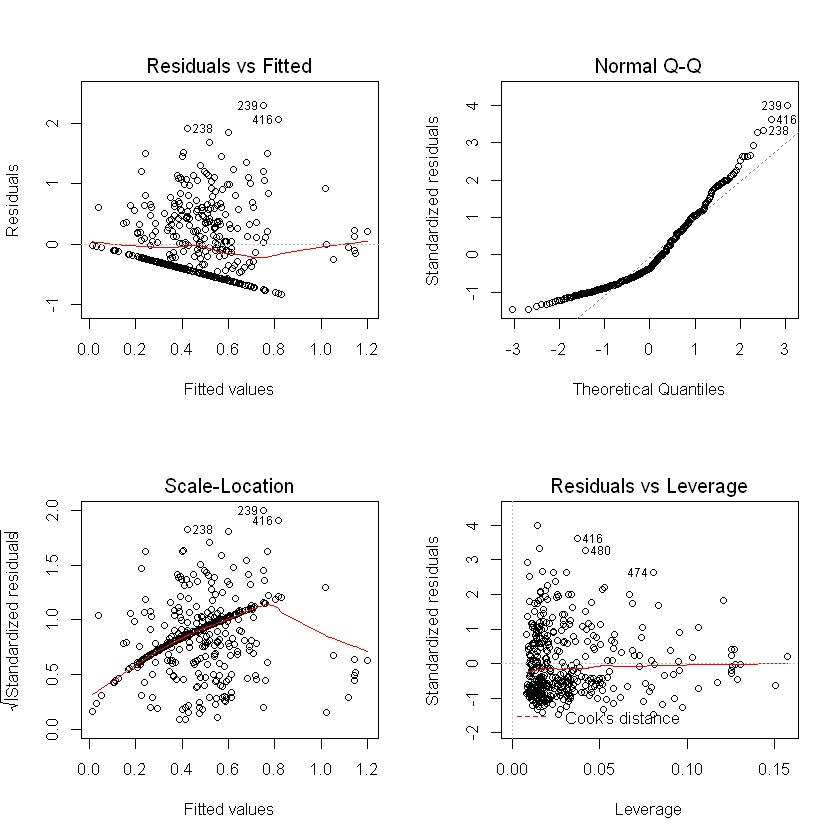

In [67]:
par(mfrow = c(2,2))
plot(linear_regression)

Residuals fitted graph does not fit the points properly and there is pattern we could see from that all points below the red line will be negative and above the line it will be positive. QQplot also suggest the same inferences. Hence from the above plots we could come to the conlusion that Linear regression model is not the best option for this particular cases since it does not fit the data properly.

#### 3.3.2 Random Forest

We will use the random forest regression method in this model. The random forest algorithm is used for prediction which uses many decision trees built from training data samples.

Arguments:
- Formula: Formula of the fitted model
- ntree: number of trees in the forest
- importance=TRUE: Whether independent variables importance in the random forest be assessed

In [68]:
random_forest_model <- randomForest(area~  X + DMC + (DC) + temp + wind + DMC:DC+
                                temp:DMC + monthaug + monthdec + monthjul + monthjun + monthmar,
                                    data = train, ntree = 900,importance = TRUE)
random_forest_model


Call:
 randomForest(formula = area ~ X + DMC + (DC) + temp + wind +      DMC:DC + temp:DMC + monthaug + monthdec + monthjul + monthjun +      monthmar, data = train, ntree = 900, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 900
No. of variables tried at each split: 3

          Mean of squared residuals: 0.3685589
                    % Var explained: -3.82

We made a random forest with 900 tree and used the train dataset to build the model.

It is natural to ask which variables have the highest predictive power after training a random forest. Variables of major importance are determinants of the results, and their values influence the results values significantly. Variables of low significance can instead be omitted from a model so that it is fitted perfectly and makes predicting easier and quicker. This is where below table helps us to understand the importance of the each variables we have considered and also helps us understand which is the most important factor.

In [69]:
importance(random_forest_model)

,%IncMSE,IncNodePurity
X,4.6162201,14.3839995
DMC,12.5878419,22.6489632
DC,12.8758579,21.2913333
temp,11.3962248,28.4828557
wind,4.4827793,16.7905766
monthaug,9.7096885,2.5357139
monthdec,17.0899099,1.7106415
monthjul,-0.8169639,1.4221560
monthjun,1.0352479,0.5233986
monthmar,9.8733585,1.0761542


<b>%IncMSE</b> shows the important variables for building an predictive model using random forest. From the list we could understand that `temp`,`DC`,`monthdec`,`DMC` are some of the important predictors.

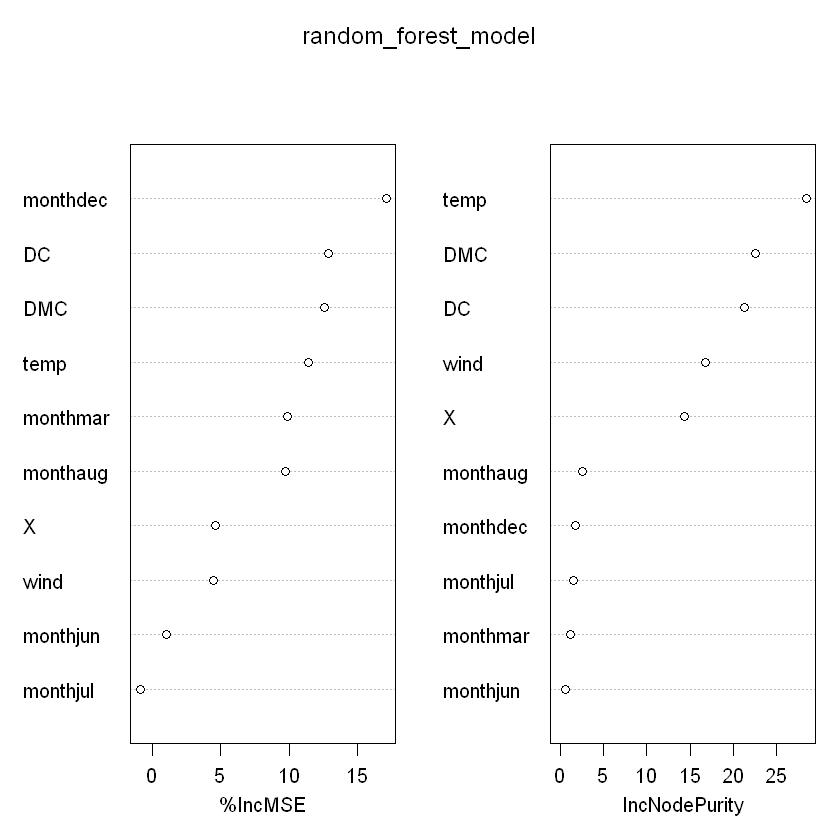

In [70]:
varImpPlot(random_forest_model)

This an pictorial representation of what we just discussed before.

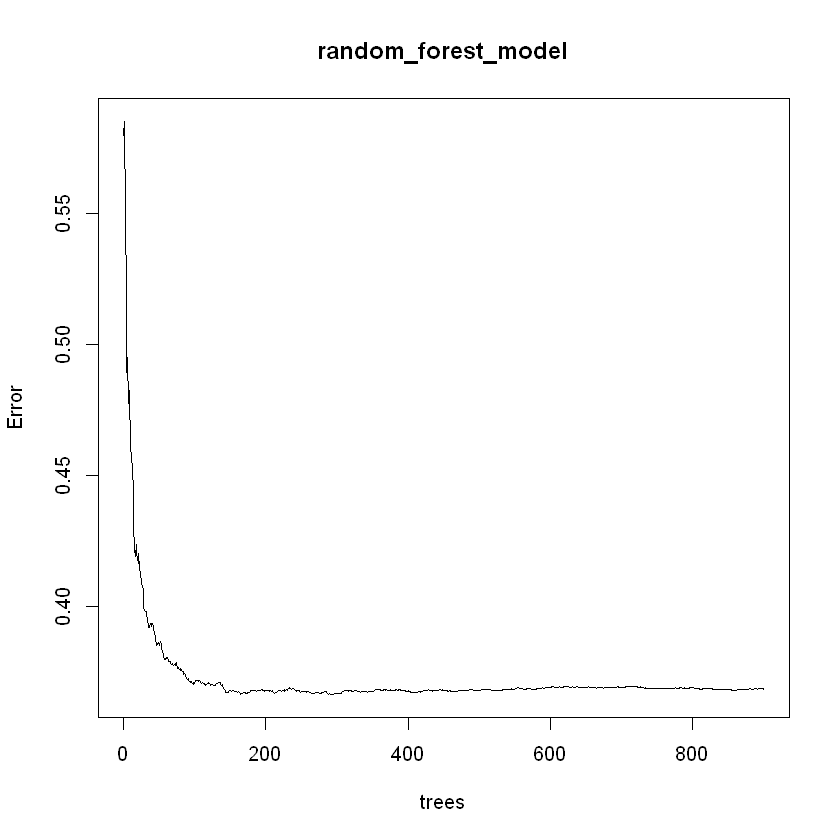

In [71]:
plot(random_forest_model)

This plot shows that tree after 200 will have the same error rate.

#### Support Vector Regression

<b>SVR</b> is used to train a support vector machine. It can be used to carry out general regression and classification (of nu and epsilon-type), as well as density-estimation. 

In [ ]:
# Regression with SVM
svr_model = svm(area ~ X + DMC + (DC) + temp + wind + DMC:DC+
                                temp:DMC + monthaug + monthdec + monthjul + monthjun + monthmar
                , data = train, scale = FALSE, kernel='linear',cost = 10 )
svr_model

#### Gradient Boosted Tree

In [ ]:
boosted_tree_model <- gbm(area ~ X + DMC + (DC) + temp + wind + DMC:DC+
                                temp:DMC + monthaug + monthdec + monthjul + monthjun + monthmar
                          , data = train, distribution="gaussian",n.trees=1000)
boosted_tree_model

In [ ]:
summary(boosted_tree_model)

### 4. Model Comparsion<a class="anchor" id="sec_4"></a>

As we finish our model development, we are now examining or compare models and to determine the most appropriate prediction model to our purpose. For this purpose we will continue using the train and test data which was used in model development. All the above 3 models are compared using RMSE and R2 value on the test data sets. For comparing the models we will use RMSE and R square value which helps us to determine the quality of the model. A model's RMSE is a convenient way of assessing the accuracy of a model and is easy to calculate for any type of model. In addition, we will show a scatter plot of Prediction vs Truth for all the models.

#####  Linear Regression

In [ ]:
predict_linear_model <- predict(linear_regression,test)
plot((predict_linear_model),truth,xlab = "predicted values", ylab = "truth values",main="Prediction vs Truth")
abline(lm(predict_linear_model~truth),col='red')

In [ ]:
preds <- predict_linear_model
actual <- truth

In [ ]:
# train RMSE
sqrt(mean((train$area - predict(linear_regression, train)) ^ 2))

In [ ]:
# test RMSE
sqrt(mean((test$area - predict(linear_regression, test)) ^ 2))

##### Random Forest

In [ ]:
predict_random_forest <- predict(random_forest_model,test)
plot((predict_random_forest),truth,xlab = "predicted values", ylab = "truth values",main="Prediction vs Truth")
abline(lm(predict_random_forest~truth),col='red')

In [ ]:
preds <- predict_random_forest
actual <- truth

In [ ]:
# train RMSE
sqrt(mean((train$area - predict(random_forest_model, train)) ^ 2))

In [ ]:
# test RMSE
sqrt(mean((test$area - predict(random_forest_model, test)) ^ 2))

##### Support Vector Regression (SVR)

In [ ]:
predict_svr <- predict(svr_model,test)
plot((predict_svr),truth,xlab = "predicted values", ylab = "truth values",main="Prediction vs Truth")
abline(lm(predict_svr~truth),col='red')

In [ ]:
preds <- predict_svr
actual <- truth

In [ ]:
# train RMSE
sqrt(mean((train$area - predict(svr_model, train)) ^ 2))

In [ ]:
# test RMSE
sqrt(mean((test$area - predict(svr_model, test)) ^ 2))

###### Boosted Tree

In [ ]:
predict_boostedtree <- predict(boosted_tree_model,test,n.trees = 1000)
plot((predict_boostedtree),truth,xlab = "predicted values", ylab = "truth values",main="Prediction vs Truth")
abline(lm(predict_boostedtree~truth),col='red')

In [ ]:
preds <- predict_boostedtree
actual <- truth

In [ ]:
# train RMSE
sqrt(mean((train$area - predict(boosted_tree_model, train,n.trees = 1000)) ^ 2))

In [ ]:
# test RMSE
sqrt(mean((test$area - predict(boosted_tree_model, test,n.trees = 1000)) ^ 2))

| MODEL | Train RMSE | Test  RMSE |
| ----- | ---- | -------- |
| Linear Regression | 0.5683 | 0.6534 |
| Random Forest | 0.3390 | 0.6561 | 
| Support Vector Regression | 22.4552 | 23.1206 | 
| Boosted Tree | 0.4882 | 0.6804 | 

<u>Conclusion</u>
<br>
RSME  is a very convenient way to judge model accuracy and can be calculated easily for any type of model regression.
<br>
From the table we could see that RMSE value for SVR is very high whereas RMSE values of other 3 models are in the same range. We have choose a model in such a way that RMSE value should be least and also we have to keep the training RMSE low. On the basis of this conditions the best fit for predicting the burned areas is `Random Forest`.
<br>
Smallest RSME value for train and test is associated with random forest model. Hence, we could say from the model comparsion that `Random Forest` is best modelling option for predicting the burned area.

## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>

In this prediction model we have employed different type of variable identification methods. <br>
First, we inferenced and obtained variables from used Exploratory Data Analysis in section 2.These variables are selected based different factors such as collinearity, multi-collinearity, outliers, transformation and many more.<br>
Select Variables from EDA:<br>
- X 
- Y
- temp
- RH 
- wind 
- rain 

<br>
Secondly, we tried to develop baseline linear regression model to figure what all combinations of the features based on several conditions such as p-value, adj-r-square, residual error. Thereafter we employed automatic selection function such as step,stepAIC to select features. Based on the results from previous mentioned methods manual trial-and-error selection was done. The resultant features is mentioned in the table below:<br>

| Model | Predictors | Target Variable | Adjusted R-squared | Residual standard error |
| ----- | ---------- | --------------- | ------------------ | ----------------------- | 
| Model 1 | X,Y,month(jan-dec),day(mon-sun),FFMC,DMC,DC,ISI,temp,RH,wind,rain | area | -0.006905 | 63.88 |
| Model 2 | X,daysat,temp | area+1 | 0.01538 | 63.16 |
| Model 3 | X,daysat,temp | log(area+1,10) | 0.00234  | 0.6066 |
| Model 4 | X,Y,temp,RH,wind,rain | area | 0.005363 | 63.48 |
| Model 5 | X,Y,temp,RH,wind,rain | log(area+1,10) | 0.003158  | 0.6064 |
| Model 6 | X, Y, monthapr, monthaug, monthdec, monthfeb, monthjan, monthjul, monthjun, monthmar, monthmay, monthnov, monthoct, monthsep, dayfri, daymon, daysat, daysun, daythu, daytue, daywed, FFMC, DMC, DC, ISI, temp, RH, wind, rain, monthsep:daysat, monthsep:DC, Y:RH, monthjul:daymon, X:daythu, DMC:RH, daythu:temp,   Y:wind, daysat:RH | log(area+1,10) | 0.0339 | 0.5969 |
| Model 7 | X,Y,monthaug,monthjul,daymon,daysat,daythu,DMC,RH,monthjul:daymon,DMC:RH,Y:RH,X:daythu,monthaug:daythu,daysat:RH,daythu:RH | log(area+1,10) |  0.01235 | 0.6036 |
| Model 8 | wind,log(temp),DMC,DC,monthaug,monthdec,monthjul,monthjun,monthmar,DMC:DC,temp:DC,log(rain+1):ISI | log(area+1,10) | 0.04249 | 0.5943 |
| Model 9 | sqrt(wind),temp,DMC,DC,monthaug,monthdec,monthjul,monthjun,monthmar,DMC:DC | log(area+1,10) | 0.04376  | 0.5939 |
| Model 10 | X,DMC,log(DC),temp,sqrt(wind),DMC:DC,temp:DMC,monthaug,monthdec,monthjul,monthjun,monthmar | log(area+1,10) | 0.04754 | 0.5927 |
| Model 11 | X,DMC,log(DC),temp,wind,DMC:DC,temp:DMC,monthaug,monthdec,monthjul,monthjun,monthmar | log(area+1,10) | 0.04725  | 0.5928 |
| Model 12 | X,DMC,log(DC),temp,sqrt(wind),DMC:DC,temp:DMC,monthaug,monthdec,monthjul,monthjun,monthmar | log(area+1,10) | 0.03724 | 0.5450 |

<br>


Based on the models the adj. r square value and residual error is examined to get the best result based on the condition that adj. r sqaure value should maximum and residual error should be minimum. On these conditions parameters in the model 10 was selected and on these parameters models was build.

## 6. Conclusion <a class="anchor" id="sec_6"></a>

In the task to predict the Burned area, three models were developed and compared for their accuracy in prediction. The initial dataset provided was constituted of 12 dependent features and 1 target. Various filtering and feature selection methods was performed and the number of significant features was reduced down. During the Exploratory Data analysis of the dataset, we were able to segregate certain variable as insignificant to the Target, certain variables were discarded for based on correlation. Several Linear Models  was developed using the different combinations features. These combinations of features was selected on the basis of p-value, adj r-square value, using automatic functions such as step,stepAIC and even performed interaction checking. Then best combinations of features was selection. The dataset was filter out based on keeping only the selected features. Then it was split  into train and test in the ratio 80:20. Using this train dataset Linear regression model, Support vector regression , boosted tree and random forest was build. Using the Test RMSE the models build was compared. From the comparsion Random Forest gave the best result. Thus we can conclude by saying that the Random Forest Algorithm is the favored method to accurately predict the burned area.

## 7. References <a class="anchor" id="sec_7"></a>

[1] Cooks Distance :-  https://www.statisticshowto.com/cooks-distance/ <br>
[2] Multivariate Analysis :- https://little-book-of-r-for-multivariate-analysis.readthedocs.io/en/latest/src/multivariateanalysis.html<br>
[3] Correlogram :- http://stackoverflow.com/questions/31709982/how-to-plot-in-r-a-correlogram-on-top-of-a-correlation-matrix<br>
[4] SVM :- https://www.kdnuggets.com/2017/03/building-regression-models-support-vector-regression.html<br>
[5] A Data Mining Approach to Predict Forest Fires using Meteorological Data :- http://www3.dsi.uminho.pt/pcortez/fires.pdf<br>
[6] Sample Forest Fire Analysis :- http://www.columbia.edu/~yh2693/ForestFire.html<br>
[7] Correation Matrix :- https://little-book-of-r-for-multivariate-analysis.readthedocs.io/en/latest/src/multivariateanalysis.html<br>
[8] Model building :- https://daviddalpiaz.github.io/r4sl/regression-for-statistical-learning.html